# **Definir caso de uso**

**Victor Anderson Jamanca Vargas**

Caso de uso:

La tarea es realizar una evaluacion de riesgo crediticio utilizando el conjunto de datos "German Credit". Contiene informacion sobre personas clasificadas como buenos o malos riesgos crediticios.

**El interes es porque** la evaluacion de riesgo crediticio en el sector financiero es importante para tomar decisiones sobre la entrega de prestamos. Un modelo de IA puede ayudar a los prestamistas a identificar a los solicitantes de prestamos que tienen mayor probabilidad de cumplir sus obligaciones y reducir el riesgo de impago.


## **Análisis del dataset**

El dataset es extraido desde el repositorio OpenML, dataset: German Credit

*   **Origen, documentacion, enlaces y referencias**
*   Autor: Dr. Hans Hofman
*   Fuente: UCI - 1994
*   Cita: UCI
*   Link: https://www.openml.org/search?type=data&status=active&id=31&sort=runs


*   **Tamaño**: El dataset original contiene de 1000 filas y 21 columnas
*   **Caracteristicas**: checking_status, duration, credit_history, purpose, credit_amount, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, age, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker, class
*   **Preprocesado ya realizado:** Desde del repositorio no informa si anteriormente ha  sido preprocesado. Aunque se va explorar este dataset y limpiar los datos segun las necesidades del analisis.
*   **Licencia del misma:** Segun los terminos de UCI
*   **Suficiencia de datos:** Con 1000 filas, el dataset puede ser suficiente en este caso de uso. Las caracteristicas se va evaluar en funcion del modelo y cantidad de datos disponibles.

# **Definir requisitos técnicos**

Métricas de evaluación del modelo propuestas: Precision, recall, F1-score y matriz de confusion
Precisión final del modelo aceptable mínima: >75%
Precisión final del modelo deseable: 90%
Recursos (CPU y RAM) destinables: CPU (Google Colab) y RAM 12.7 GB


*   Numpy
*   Pandas
*   Scikit-learn
*   Keras


Se instala la libreria CatBoost para correr este modelo.

In [ ]:
!pip install catboost

 Se pone las librerias a trabajar

In [ ]:
#Data
import pandas as pd
import numpy as np
from scipy.io import arff

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py

#Modelo
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, roc_curve

#SVC
from sklearn.svm import SVC

#KNN
from sklearn.neighbors import KNeighborsClassifier

#DTC
from sklearn.tree import DecisionTreeClassifier

#RFC
from sklearn.ensemble import RandomForestClassifier

#GBC
from sklearn.ensemble import GradientBoostingClassifier

#XGB
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

#Cat Boost Classifier
from catboost import CatBoostClassifier

#ETC
from sklearn.ensemble import ExtraTreesClassifier

#GSCV
from sklearn.model_selection import GridSearchCV

#HGBC
from sklearn.ensemble import HistGradientBoostingClassifier

#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

#Lr regressor
from sklearn.linear_model import LogisticRegression

#VotingClassifier
from sklearn.ensemble import VotingClassifier

#Keras
from keras.layers import Input, Dense
from keras.models import Model

# **Análisis de datos exploratorio**

**Presenta el dataset/dataframe: forma, características, tipo de características, resumen del mismo.**


In [ ]:
# Fijando semilla aleatroia
seed = 42


*   Se carga el archivo, en este caso 'arff', obtenido de OpenML.
*   Se usa Pandas para la carga y manejo de datos.




In [ ]:
# Cargar archivo ARFF
data = arff.loadarff('archivo.arff')

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data[0])

# Mostrar las primeras filas del DataFrame
print(df.head())


  checking_status  duration                     credit_history  \
0           b'<0'       6.0  b'critical/other existing credit'   
1     b'0<=X<200'      48.0                   b'existing paid'   
2  b'no checking'      12.0  b'critical/other existing credit'   
3           b'<0'      42.0                   b'existing paid'   
4           b'<0'      24.0              b'delayed previously'   

                  purpose  credit_amount       savings_status employment  \
0             b'radio/tv'         1169.0  b'no known savings'     b'>=7'   
1             b'radio/tv'         5951.0              b'<100'  b'1<=X<4'   
2            b'education'         2096.0              b'<100'  b'4<=X<7'   
3  b'furniture/equipment'         7882.0              b'<100'  b'4<=X<7'   
4              b'new car'         4870.0              b'<100'  b'1<=X<4'   

   installment_commitment        personal_status other_parties  \
0                     4.0         b'male single'       b'none'   
1             

In [ ]:
#Obtener las primeras 5 filas del dataset
df.head()

checking_status  duration                     credit_history  \
0           b'<0'       6.0  b'critical/other existing credit'   
1     b'0<=X<200'      48.0                   b'existing paid'   
2  b'no checking'      12.0  b'critical/other existing credit'   
3           b'<0'      42.0                   b'existing paid'   
4           b'<0'      24.0              b'delayed previously'   

                  purpose  credit_amount       savings_status employment  \
0             b'radio/tv'         1169.0  b'no known savings'     b'>=7'   
1             b'radio/tv'         5951.0              b'<100'  b'1<=X<4'   
2            b'education'         2096.0              b'<100'  b'4<=X<7'   
3  b'furniture/equipment'         7882.0              b'<100'  b'4<=X<7'   
4              b'new car'         4870.0              b'<100'  b'1<=X<4'   

   installment_commitment        personal_status other_parties  \
0                     4.0         b'male single'       b'none'   
1                     2.0  b'female div/dep/mar'       b'none'   
2                     2.0         b'male single'       b'none'   
3                     2.0         b'male single'  b'guarantor'   
4                     3.0         b'male single'       b'none'   

   residence_since    property_magnitude   age other_payment_plans  \
0              4.0        b'real estate'  67.0             b'none'   
1              2.0        b'real estate'  22.0             b'none'   
2              3.0        b'real estate'  49.0             b'none'   
3              4.0     b'life insurance'  45.0             b'none'   
4              4.0  b'no known property'  53.0             b'none'   

       housing  existing_credits                    job  num_dependents  \
0       b'own'               2.0             b'skilled'             1.0   
1       b'own'               1.0             b'skilled'             1.0   
2       b'own'               1.0  b'unskilled resident'             2.0   
3  b'for free'               1.0             b'skilled'             2.0   
4  b'for free'               2.0             b'skilled'             2.0   

  own_telephone foreign_worker    class  
0        b'yes'         b'yes'  b'good'  
1       b'none'         b'yes'   b'bad'  
2       b'none'         b'yes'  b'good'  
3       b'none'         b'yes'  b'good'  
4       b'none'         b'yes'   b'bad'

**Comprueba si existen valores incompletos, incorrectos, inválidos, nulos, no uniformes, etc.**


In [ ]:
#Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

#Verificar Valores unicos por columna
print("\nValores unicos por columna:")
print(df.nunique())

#Estadisticas
print("\nEstadisticas basicas:")
print(df.describe())

#Verificar Tipo de Datos
print("\nTipos de datos por columna:")
print(df.dtypes)

# Categorias unicas en columnas categoricas
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
  print(f"\nCategorias unicas en {column}:")
  print(df[column].value_counts())

#Comprobar valores unicos en la columna 'class'
print("\nValores unicos en la columna 'class:")
print(df['class'].unique())

Valores nulos por columna:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

Valores unicos por columna:
checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magn

Se convierte el formato de la data porque esta en bytes.

In [ ]:
# Convertir las columnas de bytes a cadenas
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [ ]:
#Se muestra la data en UTF-8 y dentro de un dataframe
df.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                     4.0         male single          none              4.0   
1                     2.0  female div/dep/mar          none              2.0   
2                     2.0         male single          none              3.0   
3                     2.0         male single     guarantor              4.0   
4                     3.0         male single          none              4.0   

  property_magnitude   age other_payment_plans   housing  existing_credits  \
0        real estate  67.0                none       own               2.0   
1        real estate  22.0                none       own               1.0   
2        real estate  49.0                none       own               1.0   
3     life insurance  45.0                none  for free               1.0   
4  no known property  53.0                none  for free               2.0   

                  job  num_dependents own_telephone foreign_worker class  
0             skilled             1.0           yes            yes  good  
1             skilled             1.0          none            yes   bad  
2  unskilled resident             2.0          none            yes  good  
3             skilled             2.0          none            yes  good  
4             skilled             2.0          none            yes   bad

**Limpiamos los datos para realizar el analisis de mejor manera**

Reemplazamos los datos en palabras, para evitar signos que acompleja al modelo.
Se reemplaza 'No known savings' y 'no cheking' a Nan. La frase 'no se sabe el ahorro' y 'no chekeado' es sinonimo de nulo que al final no sirve como informacion relevante.

In [ ]:
mapping_checking_status = {'<0': 'little', '0<=X<200':'moderate', 'no checking':pd.NA, '>=200':'rich'}
mapping_savings_status = {'<100':'little', '100<=X<500':'moderate' ,'500<=X<1000':'quite rich', '>=1000':'rich','no known savings':pd.NA}
mapping_job = {'skilled':'2', 'unskilled resident':'1','high qualif/self emp/mgmt':'3','unemp/unskilled non res':'0'}

df['checking_status'] = df['checking_status'].map(mapping_checking_status)
df['savings_status'] = df['savings_status'].map(mapping_savings_status)
df['job'] = df['job'].map(mapping_job)

df.job = df.job.astype(int)

print(df['checking_status'])
print(df['savings_status'])
print(df['job'])

0        little
1      moderate
2          <NA>
3        little
4        little
         ...   
995        <NA>
996      little
997        <NA>
998      little
999    moderate
Name: checking_status, Length: 1000, dtype: object
0          <NA>
1        little
2        little
3        little
4        little
         ...   
995      little
996      little
997      little
998      little
999    moderate
Name: savings_status, Length: 1000, dtype: object
0      2
1      2
2      1
3      2
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: job, Length: 1000, dtype: int64


# **Analiza las características:**



**Numéricas: atributos como media, distribución típica, distribución y representación como gráfica de puntos y boxplot.**

In [ ]:
media = df.mean()
print("Media de atributos numericos:")
print(media)
print(" ")
print("Creditos a largo plazo: ", df.duration.mean())
print(" ")
print("Monto promedio de dinero prestado: ", df.credit_amount.mean())
print(" ")
print("El porcentaje promedio del ingreso que se destina al pago de las cuotas, \nvalor mas alto mayor proporcion de ingresos comprometidos: ", df.installment_commitment.mean())
print(" ")
print("Duracion promedio de la residencia de personas: ", df.residence_since.mean())
print(" ")
print("Edad promedio de solicitantes", df.age.mean())
print(" ")
print("Creditos existentes, si es mas alto es mas endeudamiento", df.existing_credits.mean())
print(" ")
print("Numero de dependientes: ", df.num_dependents.mean())

Media de atributos numericos:
duration                    20.903
credit_amount             3271.258
installment_commitment       2.973
residence_since              2.845
age                         35.546
existing_credits             1.407
job                          1.904
num_dependents               1.155
dtype: float64
 
Creditos a largo plazo:  20.903
 
Monto promedio de dinero prestado:  3271.258
 
El porcentaje promedio del ingreso que se destina al pago de las cuotas, 
valor mas alto mayor proporcion de ingresos comprometidos:  2.973
 
Duracion promedio de la residencia de personas:  2.845
 
Edad promedio de solicitantes 35.546
 
Creditos existentes, si es mas alto es mas endeudamiento 1.407
 
Numero de dependientes:  1.155


<ipython-input-419-941ea931681e>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.





*   Duracion del credito (duration): Varia de 4 a 72 meses con promedio 20.9 meses, con dispersion 12.06
*   Monto del credito (credit_amount): El monto del credito varia desde 250 hasta 18424 con promedio 3271.26 y su desviacion 2822.74
*   Compromiso de la cuota (installment_commitment): El compromiso de la cuota tiene un rango de 1 a 4, con promedio de 2.97, la myoria de clientes tiene nivel medio de compromiso de cuota.
*   Tiempo de residencia (residence_since): El tiempo de residencia varia a 1 a 4 años con promedio de 2.85.
*   Edad: La edad de solicitantes de credito varia desde 19 hasta 75 años con promedio de 35.55 y la dispersion es de 11.38
*   Numero de creditos existentes (existing_credits): Numero de creditos existentes varia desde 1 hasta 4 con promedio de 1.41
*   Numero de dependientes: El numero de dependientes varia de 1 a 2 con promedio 1.16


**Victor Anderson Jamanca Vargas**

          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits          job  num_dependents  
count  1000.000000       1000.000000  1000.000000     1000.000000  
mean     35.546000          1.407000     1.904000        1.155000  
std      11.375469          0.577654     0.653614        0.362086  
min      19.000000       

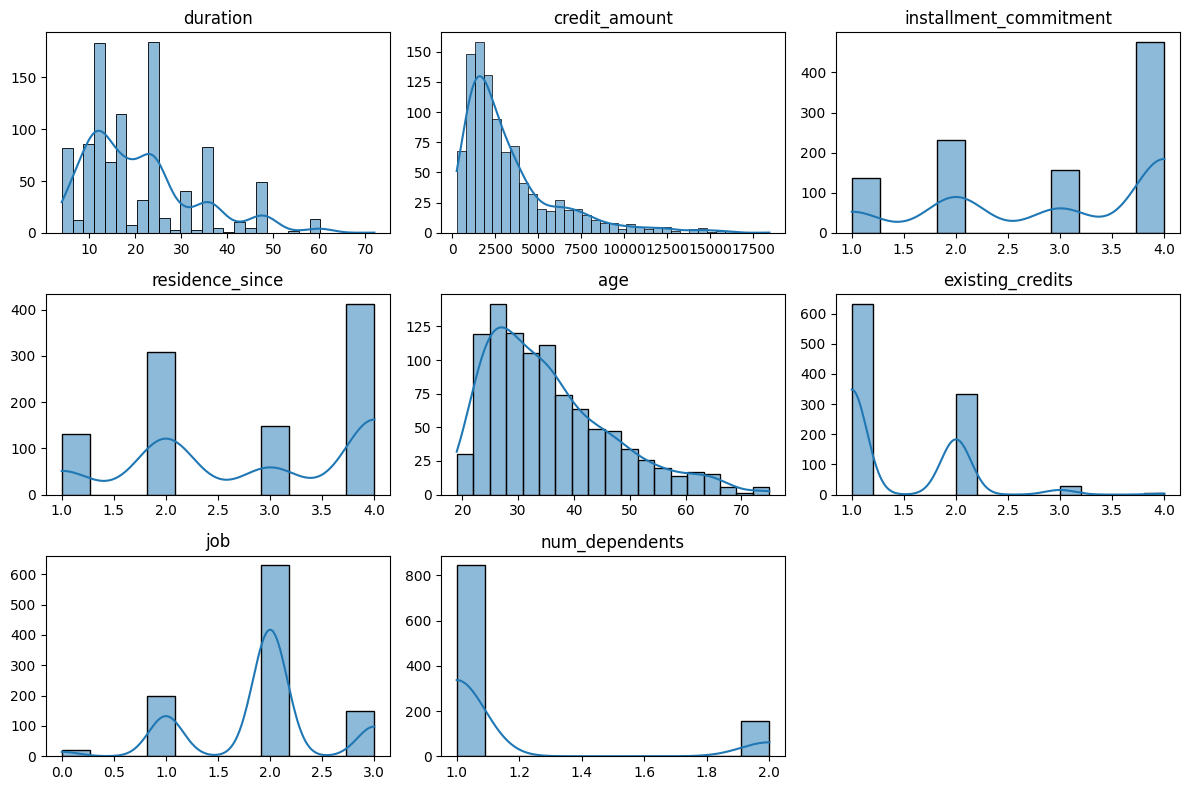

In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
print(numeric_features.describe())

# Visualizar la distribución de variables numéricas
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()

**Viendo el porcentaje de varianza**

In [ ]:
var_duration = (df.duration.std() / df.duration.mean())*100
var_credit_amount = (df.credit_amount.std() / df.credit_amount.mean())*100
var_installment_commitment = (df.installment_commitment.std() / df.credit_amount.mean()) *100
var_residence_since = (df.residence_since.std() / df.residence_since.mean())*100
var_age = (df.age.std() / df.age.mean()) * 100
var_existing_credits = (df.existing_credits.std() / df.existing_credits.mean())*100
var_num_dependents = (df.num_dependents.std() / df.num_dependents.mean())*100

print('var_duration %: ', var_duration)
print('var_credit_amount %: ', var_credit_amount)
print('var_installment_commitment %: ', var_installment_commitment)
print('var_residence_since %: ', var_residence_since)
print('var_age %: ', var_age)
print('var_existing_credits %: ', var_existing_credits)
print('var_num_dependents %: ', var_num_dependents)

var_duration %:  57.6893960328966
var_credit_amount %:  86.28903241384326
var_installment_commitment %:  0.0341983015192528
var_residence_since %:  38.79500511974881
var_age %:  32.002105931237026
var_existing_credits %:  41.05575467278608
var_num_dependents %:  31.349417467808998


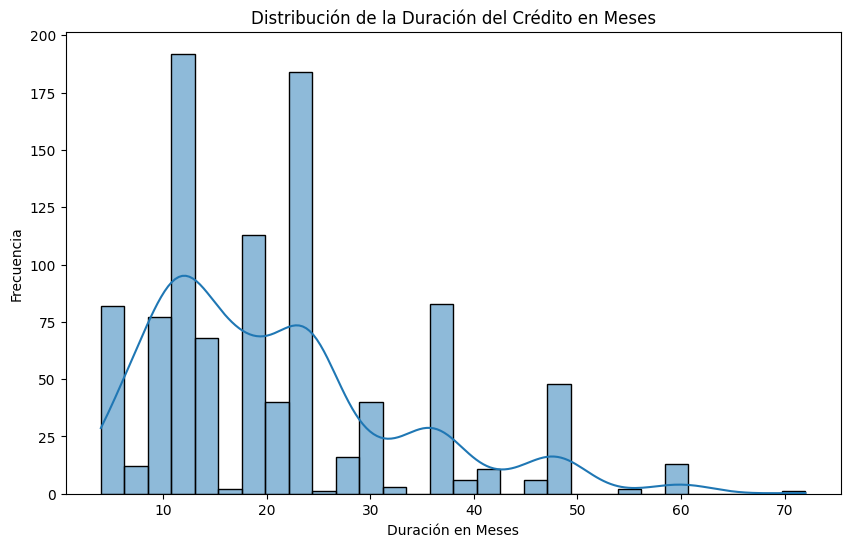

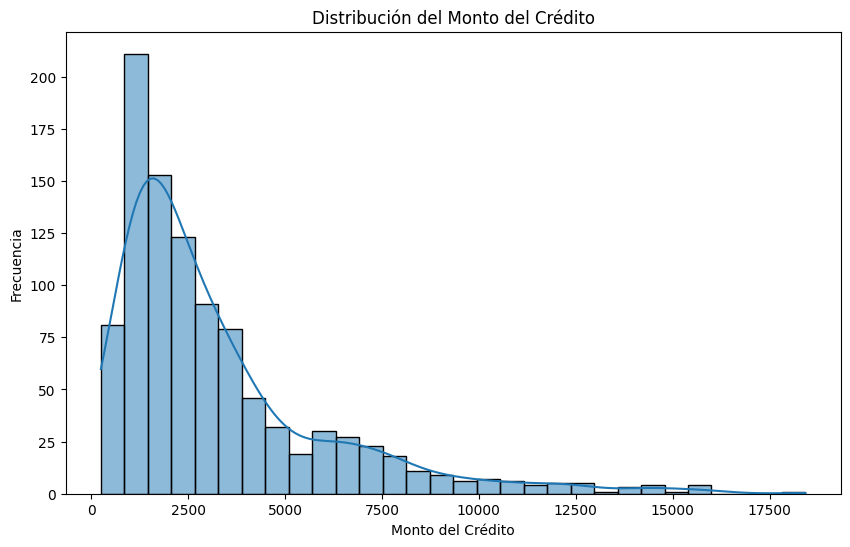

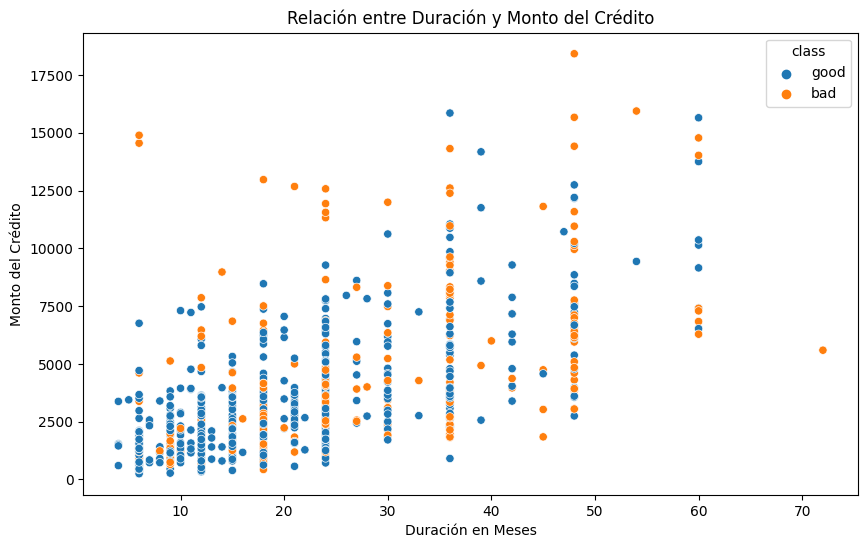

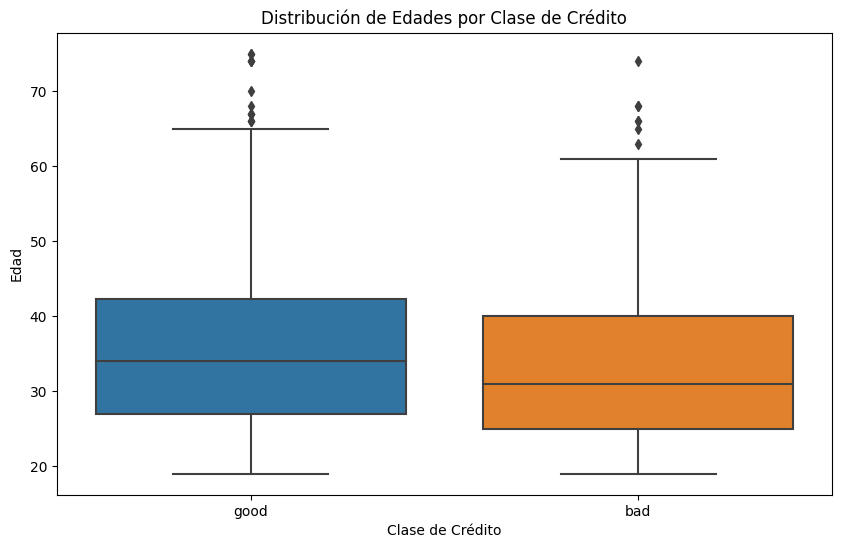

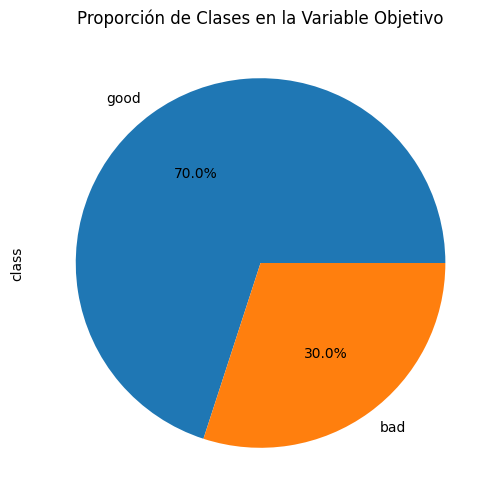

In [ ]:
# Visualizar la distribución de la duración en meses
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribución de la Duración del Crédito en Meses')
plt.xlabel('Duración en Meses')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del monto del crédito
plt.figure(figsize=(10, 6))
sns.histplot(df['credit_amount'], bins=30, kde=True)
plt.title('Distribución del Monto del Crédito')
plt.xlabel('Monto del Crédito')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la relación entre la duración y el monto del crédito
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='credit_amount', data=df, hue='class')
plt.title('Relación entre Duración y Monto del Crédito')
plt.xlabel('Duración en Meses')
plt.ylabel('Monto del Crédito')
plt.show()

# Visualizar la distribución de edades por clase
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Distribución de Edades por Clase de Crédito')
plt.xlabel('Clase de Crédito')
plt.ylabel('Edad')
plt.show()

# Visualizar la proporción de clases en la variable objetivo
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Clases en la Variable Objetivo')
plt.show()


**Categóricas: ordinal o nominal, moda, nº de categorías y representación como histograma**

In [ ]:
categorical_features = ['checking_status', 'credit_history', 'purpose', 'savings_status','employment','personal_status',
                        'other_parties', 'property_magnitude', 'other_payment_plans','housing','job','own_telephone','foreign_worker',
                        'class']

**Victor Anderson Jamanca Vargas**

Moda de caracteristicas categoricas:
checking_status               little
credit_history         existing paid
purpose                     radio/tv
savings_status                little
employment                    1<=X<4
personal_status          male single
other_parties                   none
property_magnitude               car
other_payment_plans             none
housing                          own
job                                2
own_telephone                   none
foreign_worker                   yes
class                           good
Name: 0, dtype: object

Numero de categorias:
checking_status         3
credit_history          5
purpose                10
savings_status          4
employment              5
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
class                   2
dtype: int64


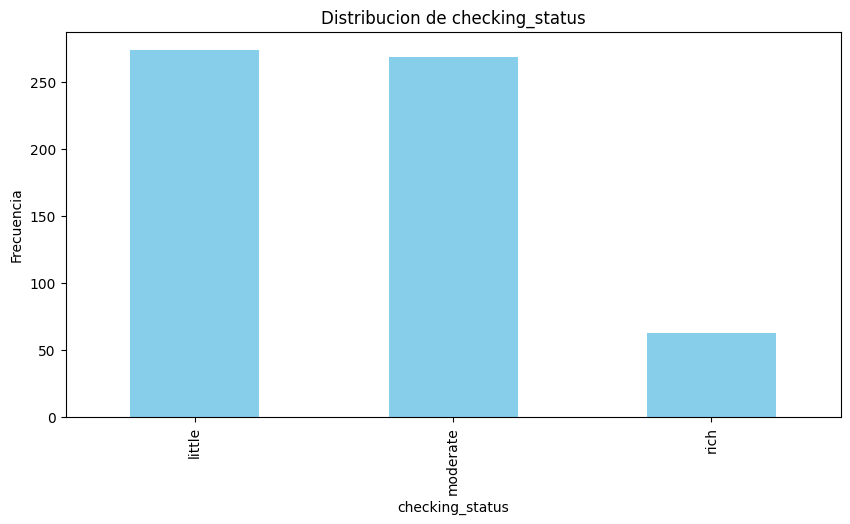

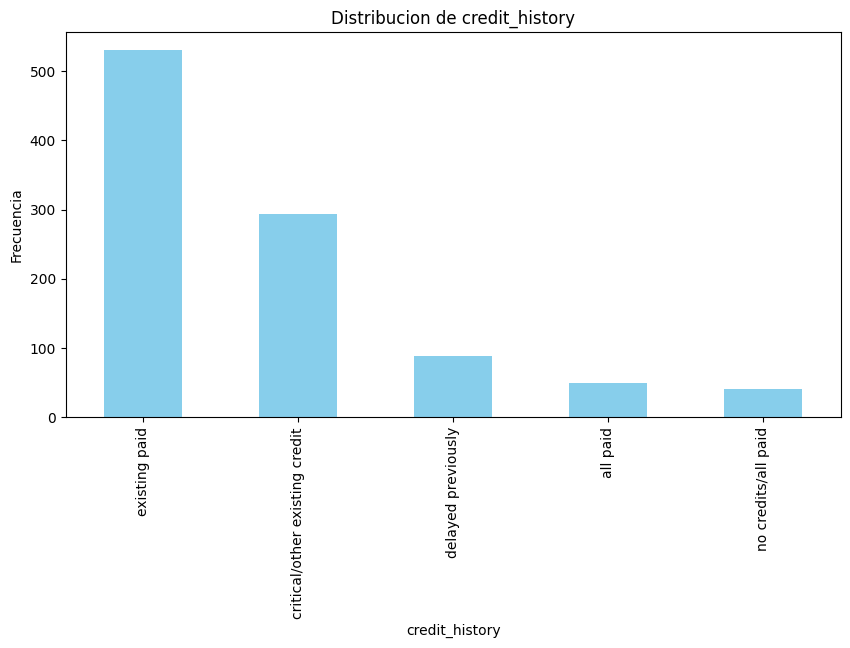

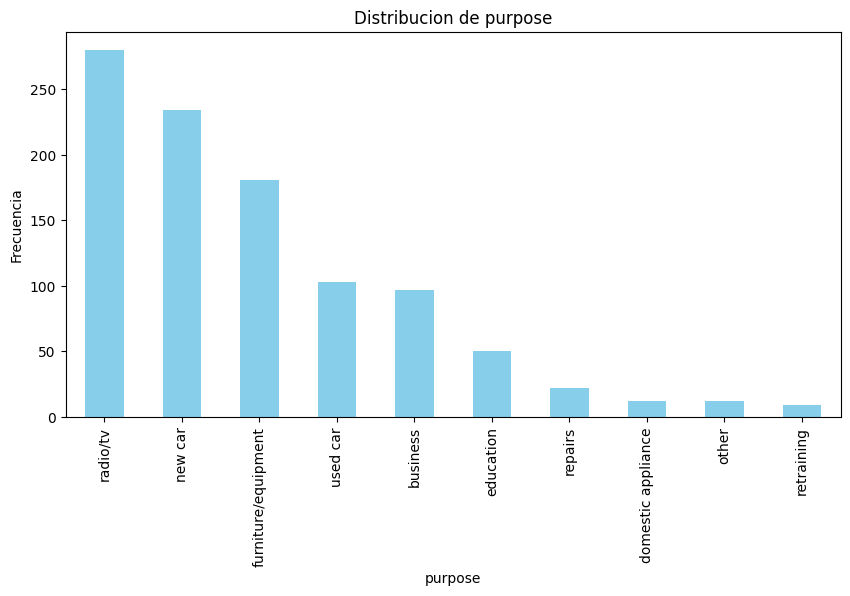

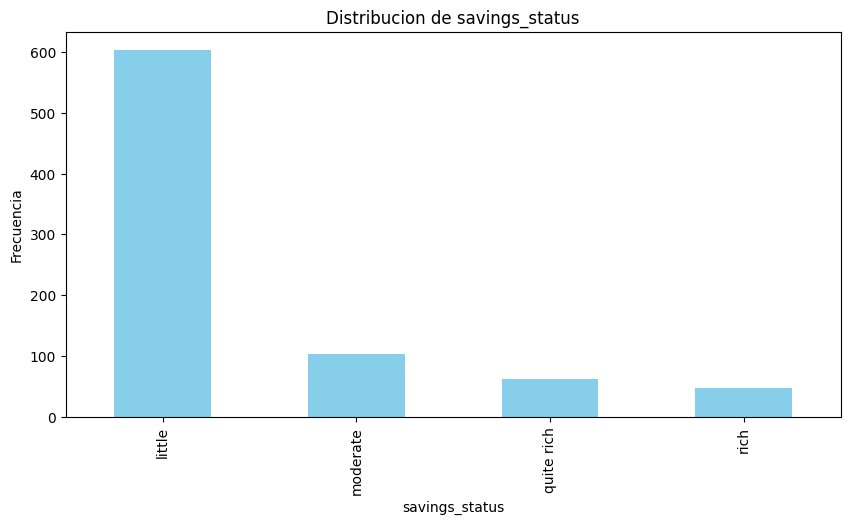

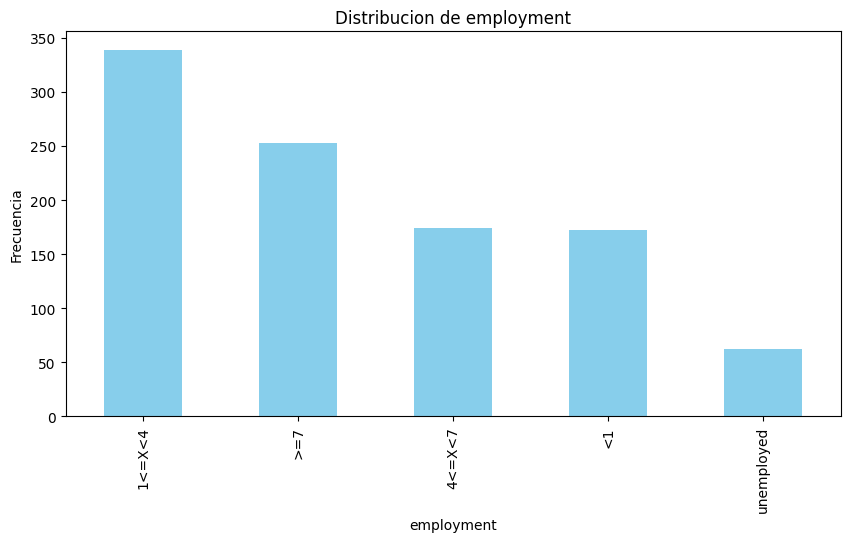

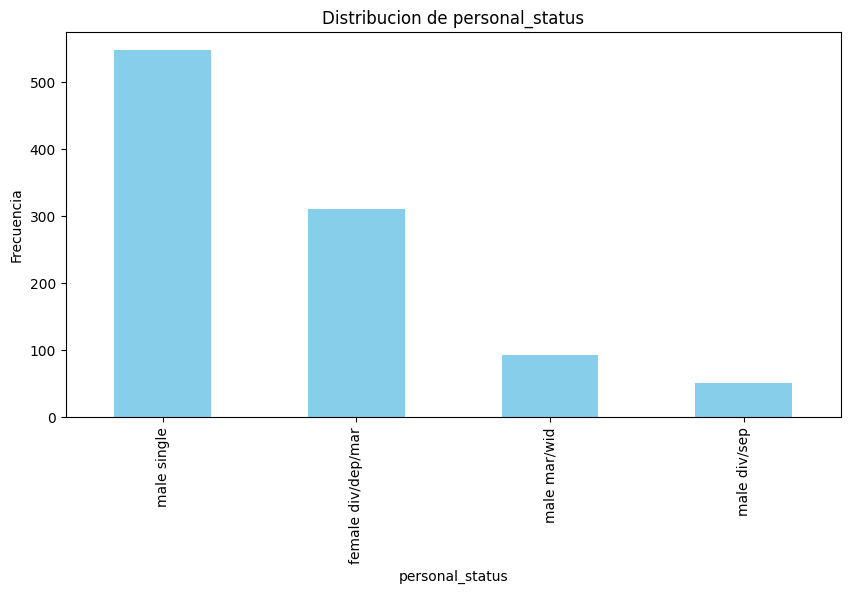

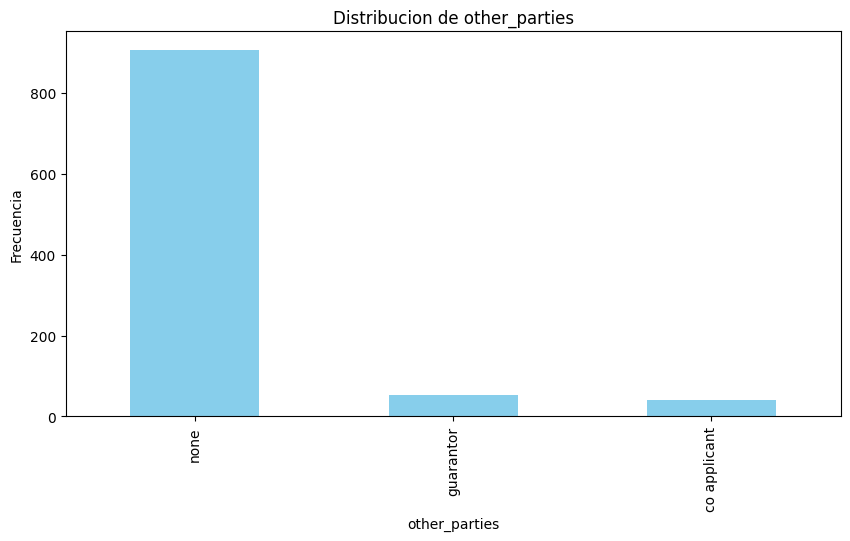

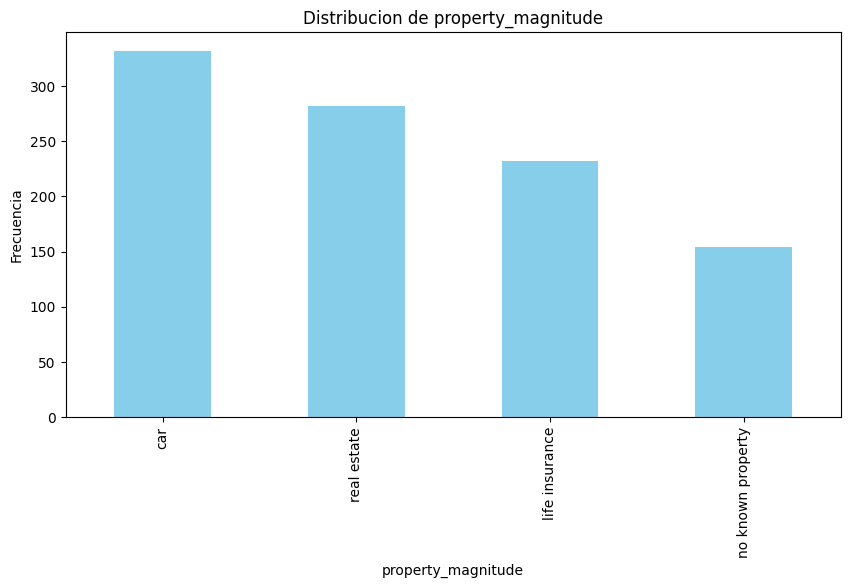

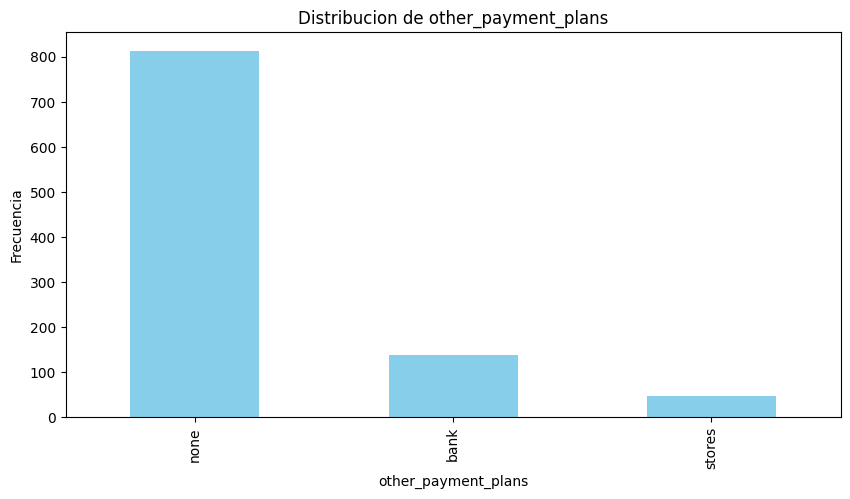

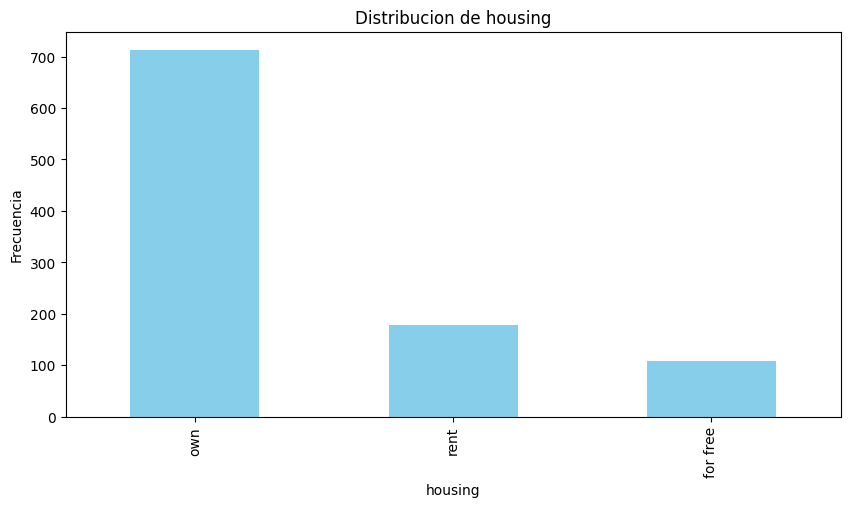

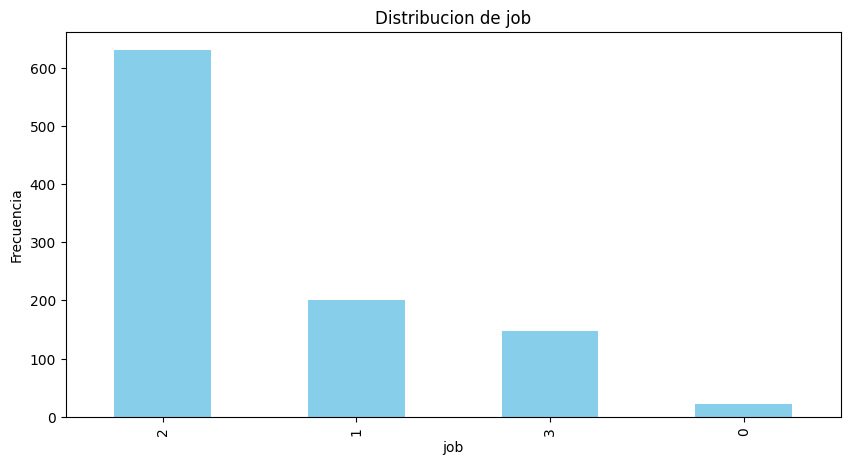

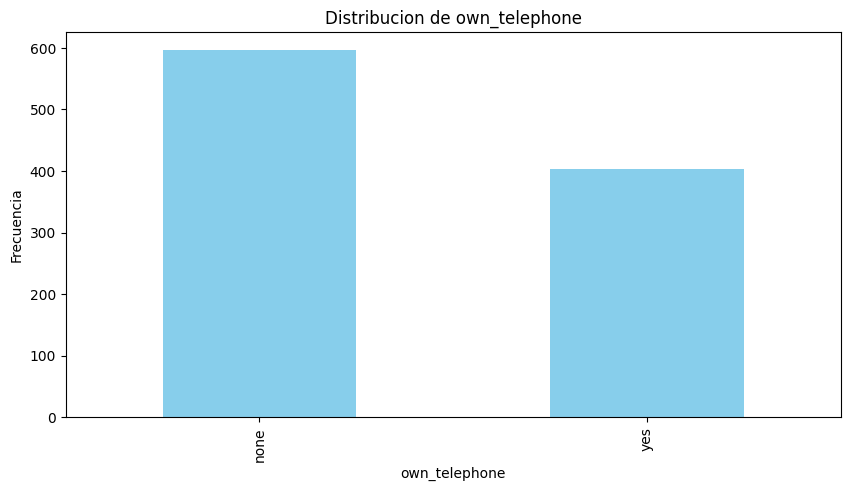

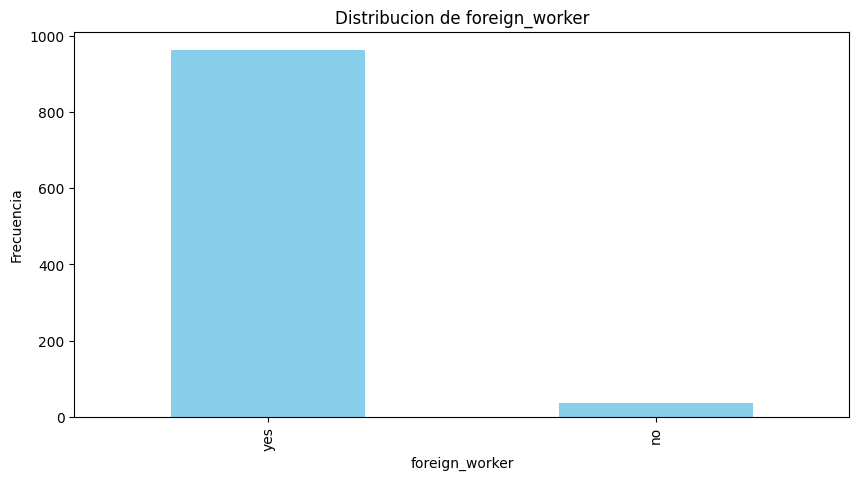

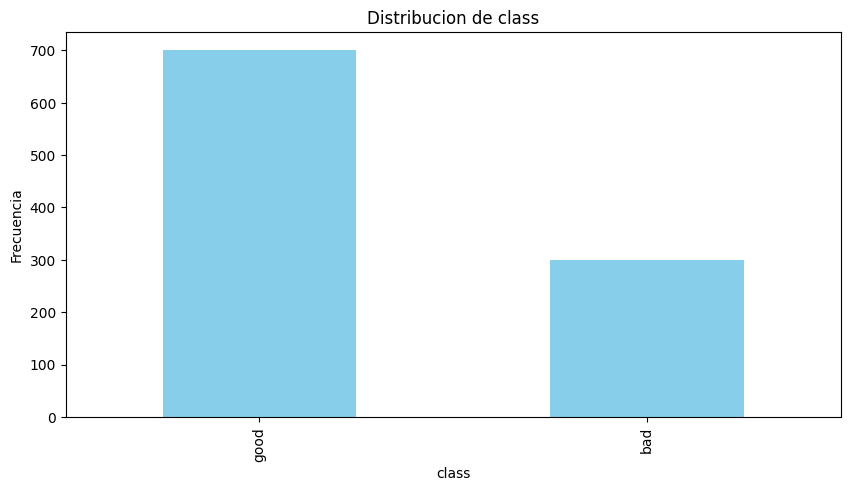

In [ ]:
mode_values = df[categorical_features].mode().iloc[0]

print("Moda de caracteristicas categoricas:")
print(mode_values)

num_categories = df[categorical_features].nunique()

print("\nNumero de categorias:")
print(num_categories)

for feature in categorical_features:
  plt.figure(figsize=(10,5))
  df[feature].value_counts().plot(kind='bar', color='skyblue')
  plt.title(f'Distribucion de {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frecuencia')

In [ ]:
df_good_overall_age = df.loc[df['class'] == 'good']['age'].values.tolist()
df_bad_overall_age = df.loc[df['class'] == 'bad']['age'].values.tolist()
df_age = df['age'].values.tolist()

trace0 = go.Histogram(
    x=df_good_overall_age,
    histnorm='probability',
    name='Good Credit'
)

trace1 = go.Histogram(
    x=df_bad_overall_age,
    histnorm='probability',
    name='Bad Credit'
)

trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name='Overall Age'
)

fig = make_subplots(rows = 2, cols = 2, specs=[[{}, {}], [{'colspan': 2}, None]],
                        subplot_titles=('Good','Bad','General Distribuition'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribution', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

Categorizando la variable Edad por rangos

In [ ]:
interval = (18, 25, 35, 60, 120)

catgs = ['Students', 'Young', 'Adult', 'Senior']
df["age_catgs"] = pd.cut(df.age, interval, labels=catgs)

df_good = df[df['class'] == 'good']
df_bad = df[df['class'] == 'bad']

trace0 = go.Box(
    y = df_good['credit_amount'],
    x = df_good['age_catgs'],
    name = 'Good credit',
    marker=dict(color='#3D9970')
)

trace1 = go.Box(
    y = df_bad['credit_amount'],
    x = df_bad['age_catgs'],
    name='Bad credit',
    marker= dict(color = '#FF4136')
)

data_ = [trace0, trace1]

layout = go.Layout(
    yaxis= dict(
        title='Credit Amount',
        zeroline=False
    ),
    xaxis = dict(
        title = 'Age Categorical'
    ),
    boxmode = 'group'
)

fig = go.Figure(data=data_, layout=layout)
py.iplot(fig, filename='box-age-cat')

In [ ]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['housing'],
            "y": df_good['credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name":'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }

        },
        {
            "type": 'violin',
            "x": df_bad['housing'],
            "y": df_bad['credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"

    }

}

py.iplot(fig, filename = 'violin/split', validate = False)

Hay valores altos de la categoria 'free' y tenemos una distribucion diferente por Riesgo

**Diferenciando el Riesgo de Credito por genero**

In [ ]:
df[['sex', 'marital_status']] = df['personal_status'].str.split(expand=True)

print(df)

    checking_status  duration                  credit_history  \
0            little       6.0  critical/other existing credit   
1          moderate      48.0                   existing paid   
2              <NA>      12.0  critical/other existing credit   
3            little      42.0                   existing paid   
4            little      24.0              delayed previously   
..              ...       ...                             ...   
995            <NA>      12.0                   existing paid   
996          little      30.0                   existing paid   
997            <NA>      12.0                   existing paid   
998          little      45.0                   existing paid   
999        moderate      45.0  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv         1169.0           <NA>         >=7   
1               radio/tv         5951.0         little      1<=X<4   
2        

In [ ]:
trace0 = go.Bar(
    x = df[df['class'] == 'good']['sex'].value_counts().index.values,
    y = df[df['class'] == 'good']['sex'].value_counts().values,
    name = 'Good Credit'
)

trace1 = go.Bar(
    x = df[df['class'] == 'bad']['sex'].value_counts().index.values,
    y = df[df['class'] == 'bad']['sex'].value_counts().values,
    name = "Bad Credit"
)

trace2 = go.Box(
    x = df[df['class'] == 'good']['sex'],
    y = df[df['class'] == 'good']['credit_amount'],
    name = trace0.name
)

trace3 = go.Box(
    x= df[df['class'] == 'bad']['sex'],
    y = df[df['class'] == 'bad']['credit_amount'],
    name=trace1.name
)

data_ = [trace0, trace1, trace2, trace3]

fig = make_subplots(rows = 1, cols=2, subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height = 400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

In [ ]:
trace0 = go.Bar(
    x = df[df['class'] == 'good']['job'].value_counts().index.values,
    y = df[df['class'] == 'good']['job'].value_counts().values,
    name = 'Good credit Distribuition'
)

trace1 = go.Bar(
    x = df[df['class'] == 'bad']['job'].value_counts().index.values,
    y = df[df['class'] == 'bad']['job'].value_counts().values,
    name = 'Bad Credit Distribuition'
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [ ]:
trace0 = go.Box(
    x = df_good['job'],
    y = df_good['credit_amount'],
    name = 'Good Credit'
)

trace1 = go.Box(
    x=df_bad['job'],
    y=df_bad['credit_amount'],
    name='Bad credit'
)

data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig, filename='box-age-cat')

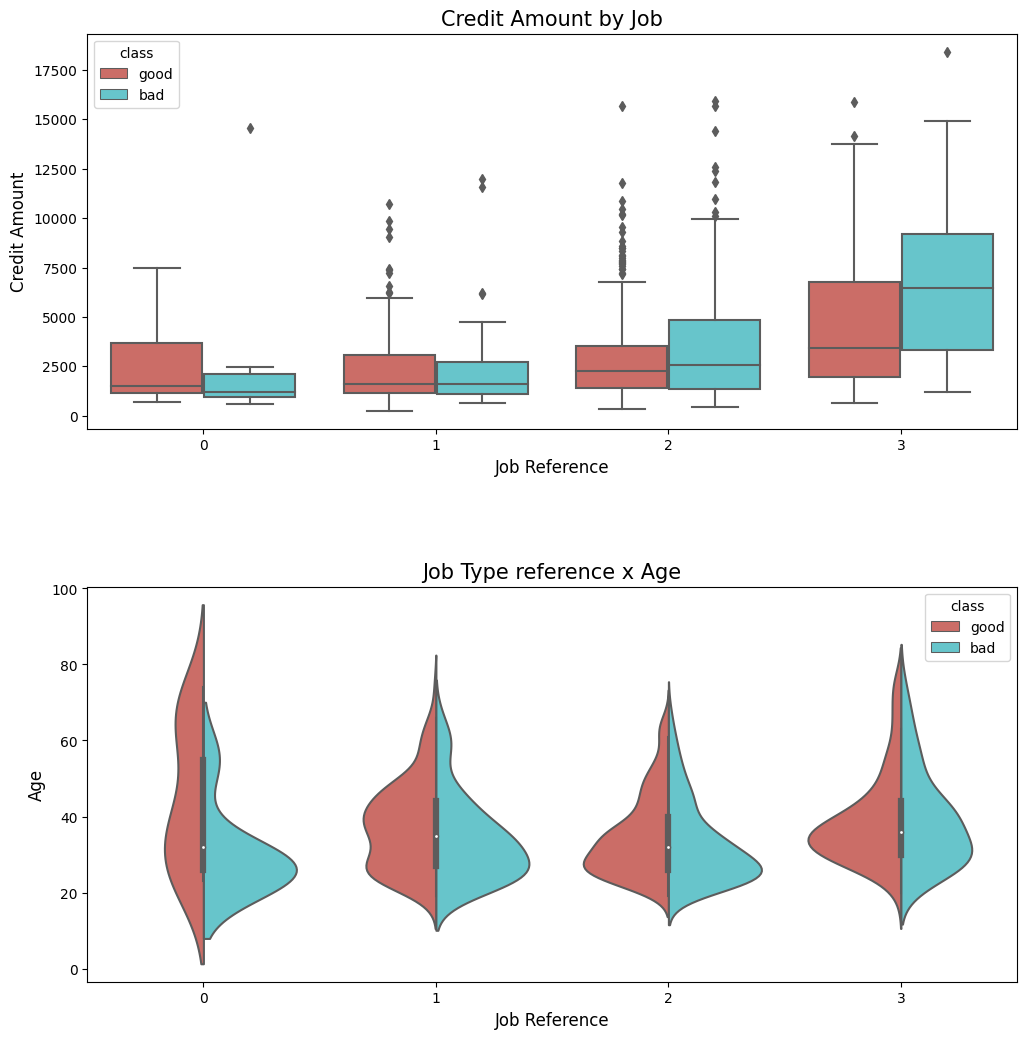

In [ ]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="job", y="credit_amount", data=df,
            palette="hls", ax=ax[0], hue="class")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="job", y="age", data=df, ax=ax[1],
               hue="class", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['credit_amount'])
x2 = np.log(df_bad["credit_amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

<ipython-input-434-066f28e4ce4b>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-434-066f28e4ce4b>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




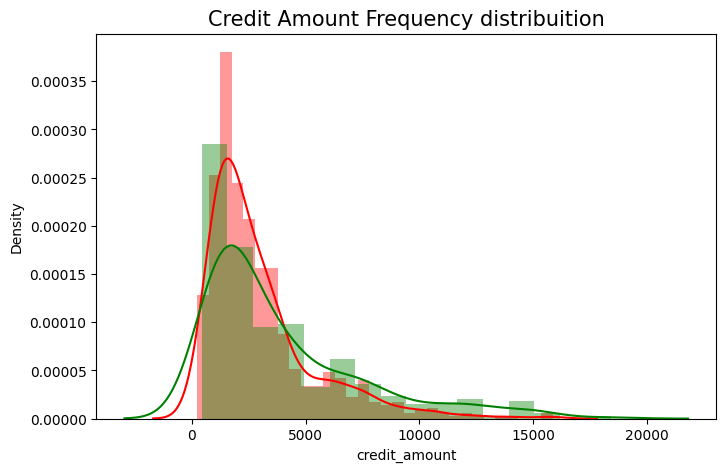

In [ ]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['credit_amount'], color='r')
g = sns.distplot(df_bad["credit_amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

In [ ]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["savings_status"].value_counts().index.values,
    y = df_good["savings_status"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["savings_status"].value_counts().index.values,
    y = df_bad["savings_status"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["savings_status"],
    y=df_good["credit_amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["savings_status"],
    y=df_bad["credit_amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["savings_status"],
    y=df_good["age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["savings_status"],
    y=df_bad["age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc',
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Description of Distribuition Saving accounts by Risk:  
class           bad  good
savings_status           
little          217   386
moderate         34    69
quite rich       11    52
rich              6    42


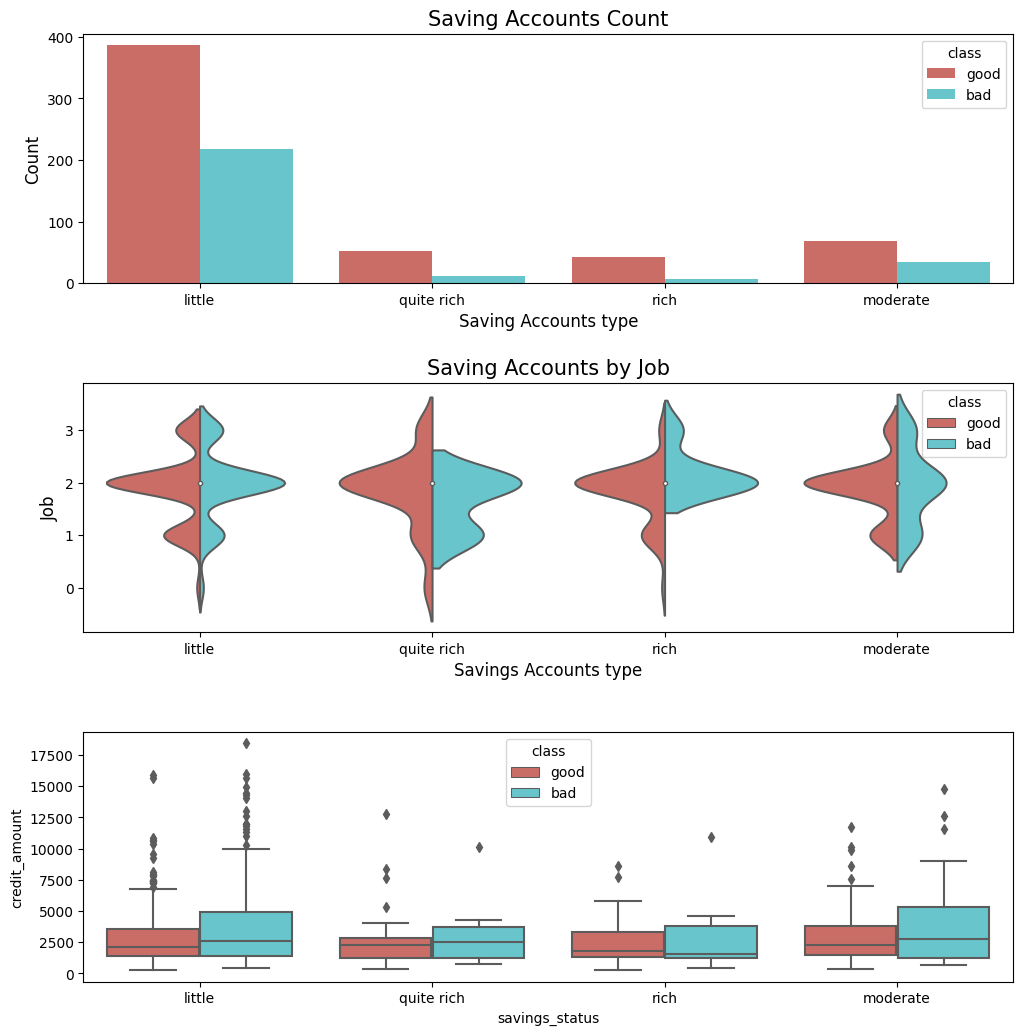

In [ ]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df["savings_status"],df['class']))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="savings_status", data=df, palette="hls",
              ax=ax[0],hue="class")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="savings_status", y="job", data=df, palette="hls",
               hue = "class", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="savings_status", y="credit_amount", data=df, ax=ax[2],
            hue = "class",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

Values describe: 
class                bad  good
purpose                       
business              34    63
domestic appliance     4     8
education             22    28
furniture/equipment   58   123
new car               89   145
other                  5     7
radio/tv              62   218
repairs                8    14
retraining             1     8
used car              17    86


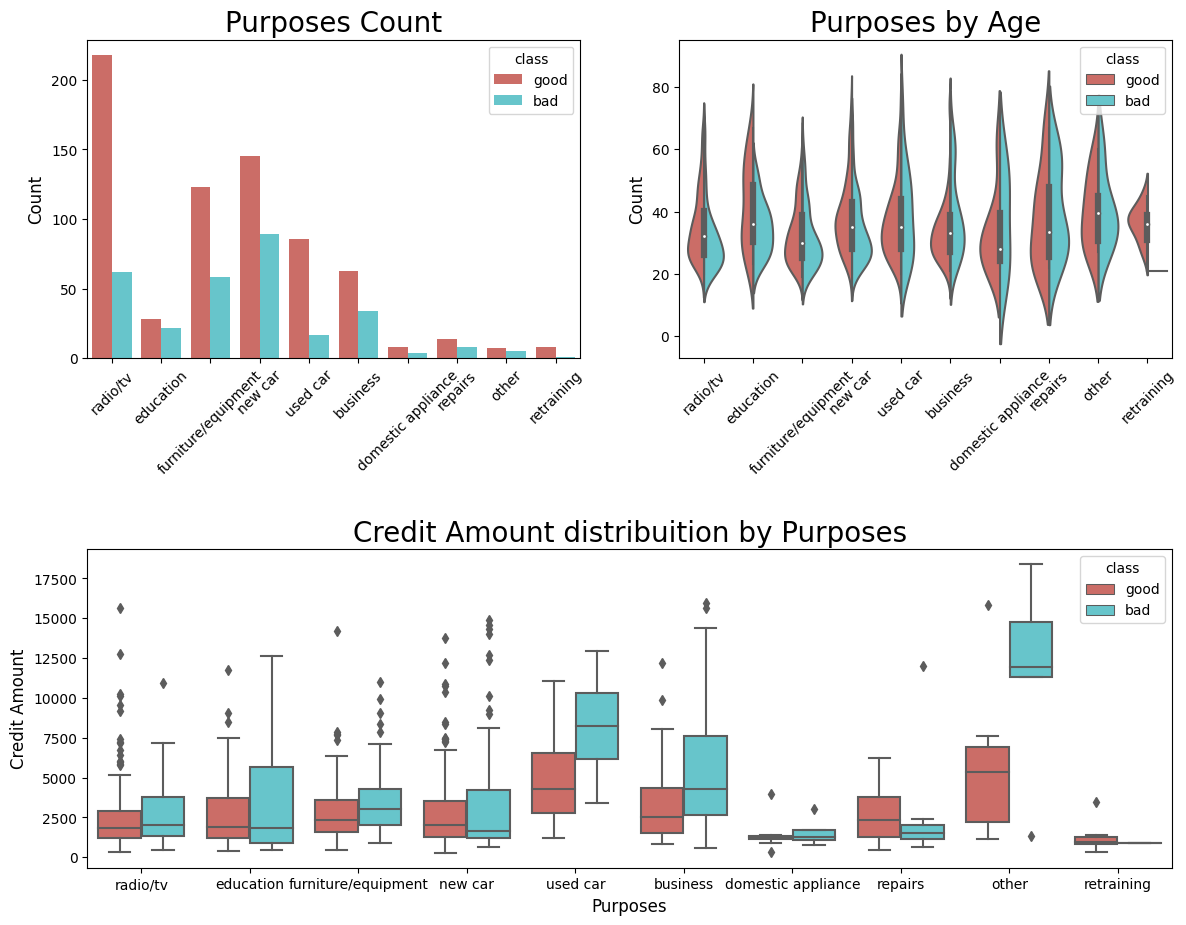

In [ ]:
print("Values describe: ")
print(pd.crosstab(df.purpose, df['class']))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="purpose", data=df,
              palette="hls", hue = "class")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="purpose", y="age", data=df,
                    palette="hls", hue = "class",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="purpose", y="credit_amount", data=df,
               palette="hls", hue = "class")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

<ipython-input-438-e9e0b1b3d0e5>:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-438-e9e0b1b3d0e5>:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




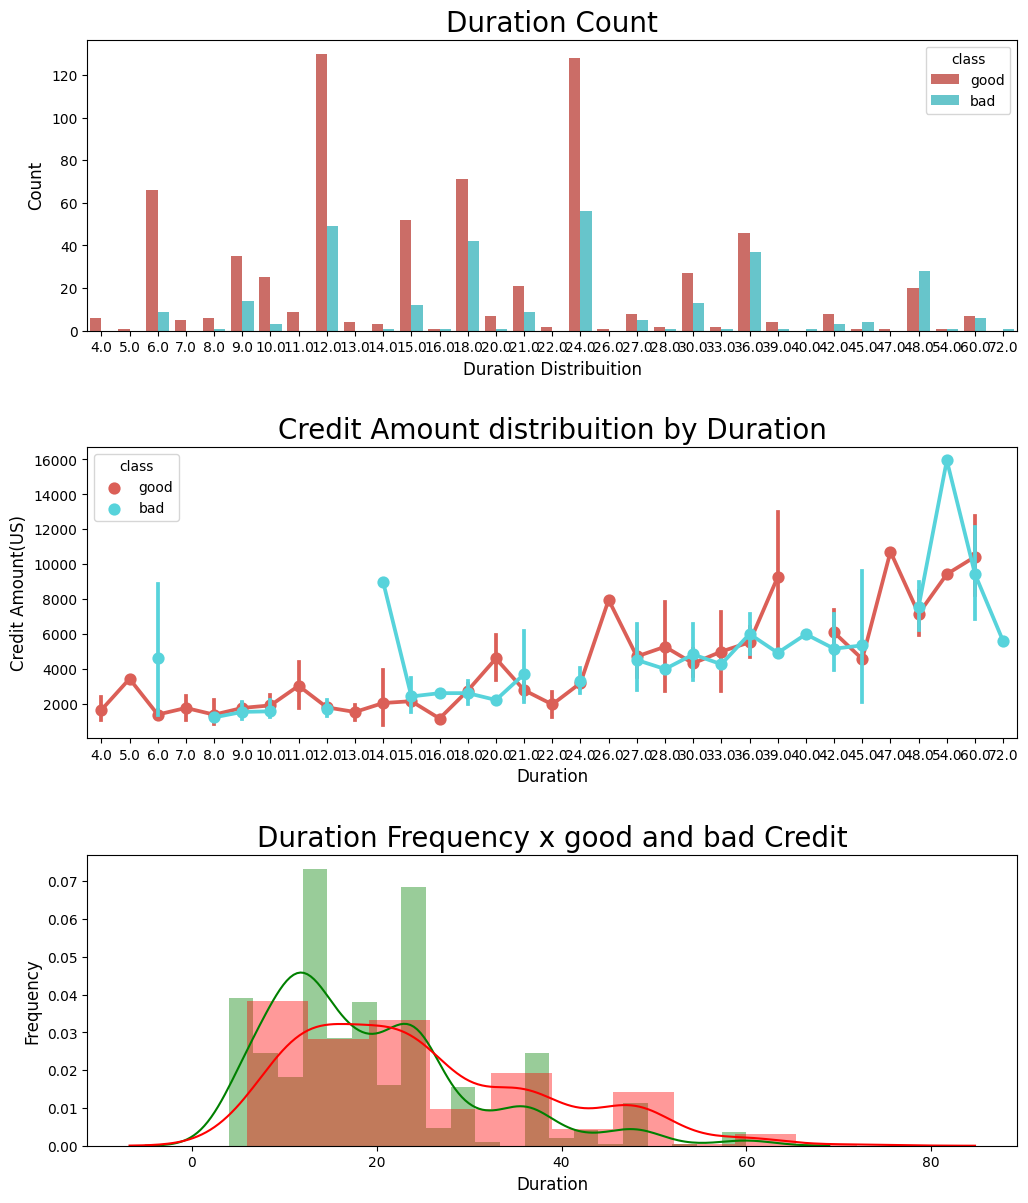

In [ ]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="duration", data=df,
              palette="hls",  hue = "class")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="duration", y ="credit_amount",data=df,
                   hue="class", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["duration"], color='g')
g2 = sns.distplot(df_bad["duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Interesting, we can see that the highest duration have the high amounts.
The highest density is between [12 ~ 18 ~ 24] months
It all make sense.

Checking Account variable
First, let's look the distribuition

**Checking Account variable**

In [ ]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'age_catgs', 'sex', 'marital_status'],
      dtype='object')

In [ ]:
trace0 = go.Bar(
    x = df[df["class"]== 'good']["checking_status"].value_counts().index.values,
    y = df[df["class"]== 'good']["checking_status"].value_counts().values,
    name='Good credit Distribuition'

)

#Second plot
trace1 = go.Bar(
    x = df[df["class"]== 'bad']["checking_status"].value_counts().index.values,
    y = df[df["class"]== 'bad']["checking_status"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

In [ ]:
df_good = df[df["class"] == 'good']
df_bad = df[df["class"] == 'bad']

trace0 = go.Box(
    y=df_good["credit_amount"],
    x=df_good["checking_status"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['credit_amount'],
    x=df_bad['checking_status'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)

data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

**Victor Anderson Jamanca Vargas**

Total values of the most missing variable: 
checking_status
little      274
moderate    269
rich         63
Name: checking_status, dtype: int64


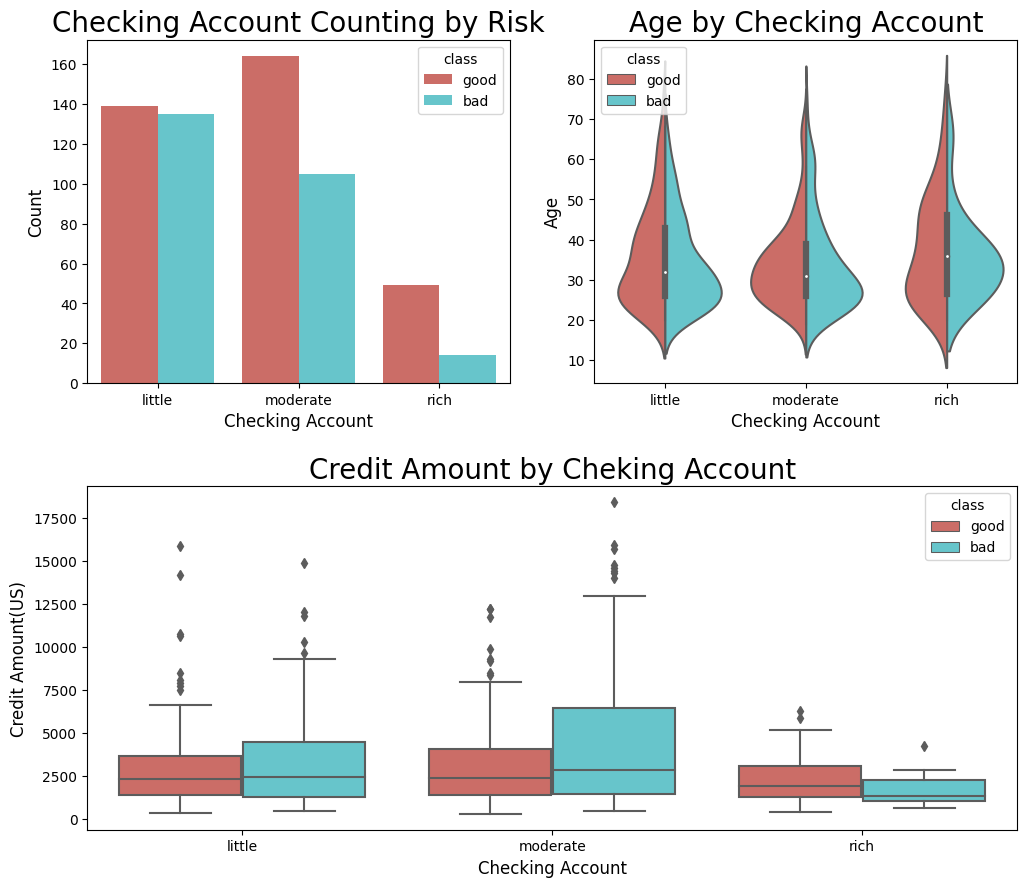

In [ ]:
print("Total values of the most missing variable: ")
print(df.groupby("checking_status")["checking_status"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="checking_status", data=df,
              palette="hls", hue="class")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="checking_status", y="age", data=df, palette="hls", hue = "class",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="checking_status",y="credit_amount", data=df,hue='class',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

In [ ]:
print(pd.crosstab(df.sex, df.job))

job      0    1    2    3
sex                      
female  12   64  197   37
male    10  136  433  111


Text(0.5, 1.0, 'Housing x Job - Dist')

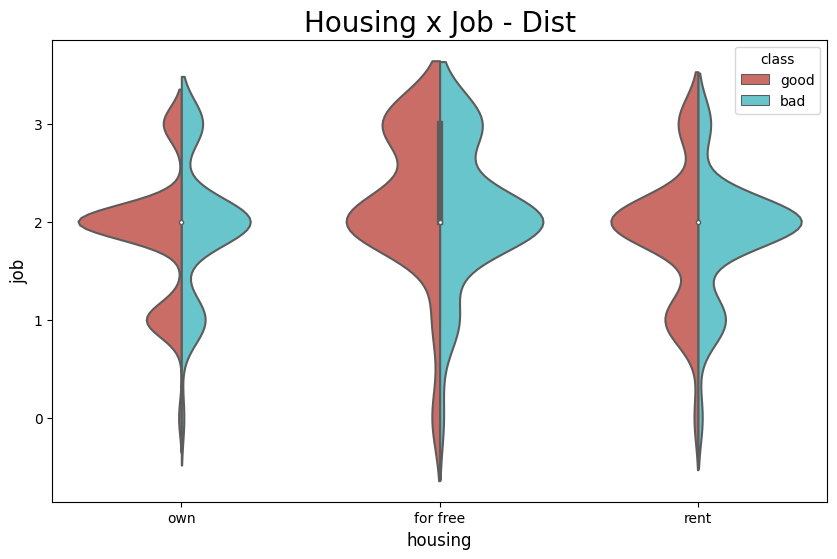

In [ ]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="housing",y="job",data=df,
                   hue="class", palette="hls",split=True)
g.set_xlabel("housing", fontsize=12)
g.set_ylabel("job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

In [ ]:
print(pd.crosstab(df["checking_status"],df.sex))

sex              female  male
checking_status              
little               88   186
moderate             86   183
rich                 20    43


In [ ]:
date_int = ["purpose", 'sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

**Looking the total of values in each categorical feature**

In [ ]:
print("Purpose : ",df.purpose.unique())
print("Sex : ",df.sex.unique())
print("Housing : ",df.housing.unique())
print("Saving accounts : ",df['savings_status'].unique())
print("Risk : ",df['class'].unique())
print("Checking account : ",df['checking_status'].unique())
print("Aget_cat : ",df['age_catgs'].unique())
print("Job : ",df['job'].unique())

Purpose :  ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
Sex :  ['male' 'female']
Housing :  ['own' 'for free' 'rent']
Saving accounts :  [<NA> 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' <NA> 'rich']
Aget_cat :  ['Senior', 'Students', 'Adult', 'Young']
Categories (4, object): ['Students' < 'Young' < 'Adult' < 'Senior']
Job :  [2 1 3 0]


**Victor Anderson Jamanca Vargas**

# **Define tu variable objetivo.**


Del dataset, la variable objetivo es 'class' para poder predecir. La columna 'class' aparece
como buenos o malos riesgo de crediticios.

# **Análisis de outliers**

Comprobamos las columnas que tienen nulos

In [ ]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(df)

                 n_miss  ratio
checking_status     394   39.4
savings_status      183   18.3


['checking_status', 'savings_status']

**Limpia los datos incorrectos, inválidos y valora eliminar o no los outliers y los incompletos**

Rellenar los valores nulos con la moda.

In [ ]:
df.age_catgs = df.age_catgs.astype(str)

In [ ]:
#df['savings_status'].fillna(df['savings_status'].mode()[0], inplace=True)
#df['checking_status'].fillna(df['checking_status'].mode()[0], inplace=True)

In [ ]:
df_d

checking_status  duration                  credit_history  \
0            little       6.0  critical/other existing credit   
1          moderate      48.0                   existing paid   
2               NaN      12.0  critical/other existing credit   
3            little      42.0                   existing paid   
4            little      24.0              delayed previously   
..              ...       ...                             ...   
995             NaN      12.0                   existing paid   
996          little      30.0                   existing paid   
997             NaN      12.0                   existing paid   
998          little      45.0                   existing paid   
999        moderate      45.0  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv         1169.0            NaN         >=7   
1               radio/tv         5951.0         little      1<=X<4   
2              education         2096.0         little      4<=X<7   
3    furniture/equipment         7882.0         little      4<=X<7   
4                new car         4870.0         little      1<=X<4   
..                   ...            ...            ...         ...   
995  furniture/equipment         1736.0         little      4<=X<7   
996             used car         3857.0         little      1<=X<4   
997             radio/tv          804.0         little         >=7   
998             radio/tv         1845.0         little      1<=X<4   
999             used car         4576.0       moderate  unemployed   

     installment_commitment     personal_status other_parties  \
0                       4.0         male single          none   
1                       2.0  female div/dep/mar          none   
2                       2.0         male single          none   
3                       2.0         male single     guarantor   
4                       3.0         male single          none   
..                      ...                 ...           ...   
995                     3.0  female div/dep/mar          none   
996                     4.0        male div/sep          none   
997                     4.0         male single          none   
998                     4.0         male single          none   
999                     3.0         male single          none   

     residence_since property_magnitude   age other_payment_plans   housing  \
0                4.0        real estate  67.0                none       own   
1                2.0        real estate  22.0                none       own   
2                3.0        real estate  49.0                none       own   
3                4.0     life insurance  45.0                none  for free   
4                4.0  no known property  53.0                none  for free   
..               ...                ...   ...                 ...       ...   
995              4.0        real estate  31.0                none       own   
996              4.0     life insurance  40.0                none       own   
997              4.0                car  38.0                none       own   
998              4.0  no known property  23.0                none  for free   
999              4.0                car  27.0                none       own   

     existing_credits  job  num_dependents own_telephone foreign_worker  \
0                 2.0    2             1.0           yes            yes   
1                 1.0    2             1.0          none            yes   
2                 1.0    1             2.0          none            yes   
3                 1.0    2             2.0          none            yes   
4                 2.0    2             2.0          none            yes   
..                ...  ...             ...           ...            ...   
995               1.0    1             1.0          none            yes   
996               1.0    3             1.0          

In [ ]:
df_d=df
df_d['checking_status'].replace({np.nan: np.nan}, inplace=True)
df_d['savings_status'].replace({np.nan: np.nan}, inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Assuming df is your DataFrame and 'Risk' is the target variable
#df_t = pd.read_csv('gcd_with_risk.csv')
df_d['class'] = df_d['class'].apply(lambda x: 1 if x=='good' else 0)

# List of imputers
imputers = {
    'constant': SimpleImputer(strategy='constant', fill_value='Unknown'),
    'mode': SimpleImputer(strategy='most_frequent'),
    'knn': KNNImputer(n_neighbors=5)
}

# Initialize encoder
encoder = OrdinalEncoder()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_d.drop('class', axis=1), df_d['class'],
                                                    test_size=0.2, random_state=seed)

# Iterating over imputers
for name, imputer in imputers.items():
    # Copy the train and test sets
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Apply encoding for knn imputer
    if name == 'knn':
        X_train_imputed[['savings_status', 'checking_status']] = encoder.fit_transform(X_train_imputed[['savings_status', 'checking_status']])
        X_test_imputed[['savings_status', 'checking_status']] = encoder.transform(X_test_imputed[['savings_status', 'checking_status']])

    # Perform imputation
    X_train_imputed[['savings_status', 'checking_status']] = imputer.fit_transform(X_train_imputed[['savings_status', 'checking_status']])
    X_test_imputed[['savings_status', 'checking_status']] = imputer.transform(X_test_imputed[['savings_status', 'checking_status']])

    # If knn, inverse transform after imputation
    if name == 'knn':
        X_train_imputed[['savings_status', 'checking_status']] = encoder.inverse_transform(X_train_imputed[['savings_status', 'checking_status']])
        X_test_imputed[['savings_status', 'checking_status']] = encoder.inverse_transform(X_test_imputed[['savings_status', 'checking_status']])

    # One-hot encoding for the categorical features
    X_train_imputed = pd.get_dummies(X_train_imputed)
    X_test_imputed = pd.get_dummies(X_test_imputed)

    # Training the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_imputed, y_train)

    # Predicting the test set results and calculating the accuracy
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Imputer: {name}, Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Imputer: constant, Accuracy: 0.805
Imputer: mode, Accuracy: 0.725
Imputer: knn, Accuracy: 0.725


In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variable: ', len(num_cols))

Number of Numerical Variable:  8


In [ ]:
num_cols

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'job',
 'num_dependents']

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        outliers = (dataframe[col] > up_limit) | (dataframe[col] < low_limit)
        if outliers.any():
            number_of_outliers = outliers.sum()
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names


has_outliers(df, num_cols)


duration : 70
credit_amount : 72
age : 23
existing_credits : 6
job : 370
num_dependents : 155


['duration',
 'credit_amount',
 'age',
 'existing_credits',
 'job',
 'num_dependents']

Reemplazamos los valores atipicos con numeros y despues aplicar se ve que ya no hay valores atipicos.

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)


has_outliers(df, num_cols)

[]

In [ ]:
print("Job : ",df['job'].value_counts())

Job :  2    1000
Name: job, dtype: int64


In [ ]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [ ]:
print("Purpose : ",df.purpose.unique())
print("Sex : ",df.sex.unique())
print("Housing : ",df.housing.unique())
print("Saving accounts : ",df['savings_status'].unique())
print("Risk : ",df['class'].unique())
print("Checking account : ",df['checking_status'].unique())
print("Age_cat : ",df['age_catgs'].unique())
print("Job : ",df['job'].unique())

Purpose :  ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
Sex :  ['male' 'female']
Housing :  ['own' 'for free' 'rent']
Saving accounts :  ['little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' 'rich']
Age_cat :  ['Senior' 'Students' 'Adult' 'Young']
Job :  [2]


In [ ]:
pd.set_option('display.max_columns', None)
df

checking_status  duration                  credit_history  \
0            little       6.0  critical/other existing credit   
1          moderate      42.0                   existing paid   
2            little      12.0  critical/other existing credit   
3            little      42.0                   existing paid   
4            little      24.0              delayed previously   
..              ...       ...                             ...   
995          little      12.0                   existing paid   
996          little      30.0                   existing paid   
997          little      12.0                   existing paid   
998          little      42.0                   existing paid   
999        moderate      42.0  critical/other existing credit   

                 purpose  credit_amount savings_status  employment  \
0               radio/tv         1169.0         little         >=7   
1               radio/tv         5951.0         little      1<=X<4   
2              education         2096.0         little      4<=X<7   
3    furniture/equipment         7882.0         little      4<=X<7   
4                new car         4870.0         little      1<=X<4   
..                   ...            ...            ...         ...   
995  furniture/equipment         1736.0         little      4<=X<7   
996             used car         3857.0         little      1<=X<4   
997             radio/tv          804.0         little         >=7   
998             radio/tv         1845.0         little      1<=X<4   
999             used car         4576.0       moderate  unemployed   

     installment_commitment     personal_status other_parties  \
0                       4.0         male single          none   
1                       2.0  female div/dep/mar          none   
2                       2.0         male single          none   
3                       2.0         male single     guarantor   
4                       3.0         male single          none   
..                      ...                 ...           ...   
995                     3.0  female div/dep/mar          none   
996                     4.0        male div/sep          none   
997                     4.0         male single          none   
998                     4.0         male single          none   
999                     3.0         male single          none   

     residence_since property_magnitude   age other_payment_plans   housing  \
0                4.0        real estate  64.5                none       own   
1                2.0        real estate  22.0                none       own   
2                3.0        real estate  49.0                none       own   
3                4.0     life insurance  45.0                none  for free   
4                4.0  no known property  53.0                none  for free   
..               ...                ...   ...                 ...       ...   
995              4.0        real estate  31.0                none       own   
996              4.0     life insurance  40.0                none       own   
997              4.0                car  38.0                none       own   
998              4.0  no known property  23.0                none  for free   
999              4.0                car  27.0                none       own   

     existing_credits  job  num_dependents own_telephone foreign_worker class  \
0                 2.0    2             1.0           yes            yes  good   
1                 1.0    2             1.0          none            yes   bad   
2                 1.0    2             1.0          none            yes  good   
3                 1.0    2             1.0          none            yes  good   
4                 2.0    2             1.0          none            yes   bad   
..                ...  ...             ...           ...            ...   ...   
995               1.0    2             1.0          none            yes  good   
996 

**Categóricas**: ordinales, one-hot encoding, llevar a numéricas. Posibles cruces de características.

In [ ]:
#Purpose to Dummies Variable
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df = df.merge(pd.get_dummies(df.sex, drop_first=True, prefix='sex'), left_index=True, right_index=True)
# Housing get dummies
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df = df.merge(pd.get_dummies(df["savings_status"], drop_first=True, prefix='savings'), left_index=True, right_index=True)
# Housing get Risk
df = df.merge(pd.get_dummies(df['class'], prefix='class'), left_index=True, right_index=True)
# Housing get Checking Account
df = df.merge(pd.get_dummies(df["checking_status"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df = df.merge(pd.get_dummies(df["age_catgs"], drop_first=True, prefix='age_catgs'), left_index=True, right_index=True)

**Victor Anderson Jamanca Vargas**

In [ ]:
df1

credit_amount  installment_commitment   age  existing_credits  job  \
0         7.063904                     4.0  64.5               2.0    2   
1         8.691315                     2.0  22.0               1.0    2   
2         7.647786                     2.0  49.0               1.0    2   
3         8.972337                     2.0  45.0               1.0    2   
4         8.490849                     3.0  53.0               2.0    2   
..             ...                     ...   ...               ...  ...   
995       7.459339                     3.0  31.0               1.0    2   
996       8.257645                     4.0  40.0               1.0    2   
997       6.689599                     4.0  38.0               1.0    2   
998       7.520235                     4.0  23.0               1.0    2   
999       8.428581                     3.0  27.0               1.0    2   

     class  purpose_domestic appliance  purpose_education  \
0        1                           0                  0   
1        0                           0                  0   
2        1                           0                  1   
3        1                           0                  0   
4        0                           0                  0   
..     ...                         ...                ...   
995      1                           0                  0   
996      1                           0                  0   
997      1                           0                  0   
998      0                           0                  0   
999      1                           0                  0   

     purpose_furniture/equipment  purpose_new car  purpose_other  \
0                              0                0              0   
1                              0                0              0   
2                              0                0              0   
3                              1                0              0   
4                              0                1              0   
..                           ...              ...            ...   
995                            1                0              0   
996                            0                0              0   
997                            0                0              0   
998                            0                0              0   
999                            0                0              0   

     purpose_radio/tv  purpose_repairs  purpose_retraining  purpose_used car  \
0                   1                0                   0                 0   
1                   1                0                   0                 0   
2                   0                0                   0                 0   
3                   0                0                   0                 0   
4                   0                0                   0                 0   
..                ...              ...                 ...               ...   
995                 0                0                   0                 0   
996                 0                0                   0                 1   
997                 1                0                   0                 0   
998                 1                0                   0                 0   
999                 0                0                   0                 1   

     sex_male  housing_own  housing_rent  savings_moderate  \
0           1            1             0                 0   
1           0            1             0                 0   
2           1            1             0                 0   
3           1            0             0                 0   
4           1            0             0                 0   
..        ...          ...           ...               ...   
995         0            1             0                 0   
996         1            1             0                 0   
997         1            1         

Eliminamos las variables que no se van usar, las que se van usar para nuestro modelo son las que se han pasado a dummies y otras columnas que no se van usar para los modelos.

In [ ]:
droplist=["sex","housing","savings_status","checking_status","purpose","class","age_catgs",'duration',#'credit_amount',
          'own_telephone', 'foreign_worker', 'other_parties', 'residence_since', 'num_dependents', 'other_payment_plans', 'class_good',
          'employment','credit_history', 'personal_status', 'property_magnitude', 'marital_status']
df1 = df.drop(droplist, axis= 1)

**Preprocesa las características:** **Numéricas**: como tal, bucketizar o categorizar, polinomios, raíces y logaritmos, etc.

In [ ]:
df1['credit_amount'] = np.log(df['credit_amount'])

df1['duration_x'] = df['duration'] ** 2

In [ ]:
df1

credit_amount  installment_commitment   age  existing_credits  job  \
0         7.063904                     4.0  64.5               2.0    2   
1         8.691315                     2.0  22.0               1.0    2   
2         7.647786                     2.0  49.0               1.0    2   
3         8.972337                     2.0  45.0               1.0    2   
4         8.490849                     3.0  53.0               2.0    2   
..             ...                     ...   ...               ...  ...   
995       7.459339                     3.0  31.0               1.0    2   
996       8.257645                     4.0  40.0               1.0    2   
997       6.689599                     4.0  38.0               1.0    2   
998       7.520235                     4.0  23.0               1.0    2   
999       8.428581                     3.0  27.0               1.0    2   

     purpose_domestic appliance  purpose_education  \
0                             0                  0   
1                             0                  0   
2                             0                  1   
3                             0                  0   
4                             0                  0   
..                          ...                ...   
995                           0                  0   
996                           0                  0   
997                           0                  0   
998                           0                  0   
999                           0                  0   

     purpose_furniture/equipment  purpose_new car  purpose_other  \
0                              0                0              0   
1                              0                0              0   
2                              0                0              0   
3                              1                0              0   
4                              0                1              0   
..                           ...              ...            ...   
995                            1                0              0   
996                            0                0              0   
997                            0                0              0   
998                            0                0              0   
999                            0                0              0   

     purpose_radio/tv  purpose_repairs  purpose_retraining  purpose_used car  \
0                   1                0                   0                 0   
1                   1                0                   0                 0   
2                   0                0                   0                 0   
3                   0                0                   0                 0   
4                   0                0                   0                 0   
..                ...              ...                 ...               ...   
995                 0                0                   0                 0   
996                 0                0                   0                 1   
997                 1                0                   0                 0   
998                 1                0                   0                 0   
999                 0                0                   0                 1   

     sex_male  housing_own  housing_rent  savings_moderate  \
0           1            1             0                 0   
1           0            1             0                 0   
2           1            1             0                 0   
3           1            0             0                 0   
4           1            0             0                 0   
..        ...          ...           ...               ...   
995         0            1             0                 0   
996         1            1             0                 0   
997         1            1             0                 0   
998         1            0             0                 

Reordena los datos aleatoriamente.

**Victor Anderson Jamanca Vargas**

In [ ]:
X = df1.drop('class_bad', 1).values
y = df1['class_bad'].values

<ipython-input-256-b316b8a1fc40>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
X, y = shuffle(X, y, random_state=seed)

Reescala o normaliza los datos de entrenamiento.

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

Resume las características y sus atributos y distribuciones tras el preprocesado.

In [ ]:
df.describe()

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.307000    3051.101000                2.973000         2.845000   
std      10.615151    2187.140403                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      42.000000    7882.375000                4.000000         4.000000   

               age  existing_credits     job  num_dependents  \
count  1000.000000       1000.000000  1000.0          1000.0   
mean     35.453500          1.404000     2.0             1.0   
std      11.106324          0.565335     0.0             0.0   
min      19.000000          1.000000     2.0             1.0   
25%      27.000000          1.000000     2.0             1.0   
50%      33.000000          1.000000     2.0             1.0   
75%      42.000000          2.000000     2.0             1.0   
max      64.500000          3.500000     2.0             1.0   

       purpose_domestic appliance  purpose_education  \
count                  1000.00000        1000.000000   
mean                      0.01200           0.050000   
std                       0.10894           0.218054   
min                       0.00000           0.000000   
25%                       0.00000           0.000000   
50%                       0.00000           0.000000   
75%                       0.00000           0.000000   
max                       1.00000           1.000000   

       purpose_furniture/equipment  purpose_new car  purpose_other  \
count                  1000.000000      1000.000000     1000.00000   
mean                      0.181000         0.234000        0.01200   
std                       0.385211         0.423584        0.10894   
min                       0.000000         0.000000        0.00000   
25%                       0.000000         0.000000        0.00000   
50%                       0.000000         0.000000        0.00000   
75%                       0.000000         0.000000        0.00000   
max                       1.000000         1.000000        1.00000   

       purpose_radio/tv  purpose_repairs  purpose_retraining  \
count       1000.000000      1000.000000         1000.000000   
mean           0.280000         0.022000            0.009000   
std            0.449224         0.146757            0.094488   
min            0.000000         0.000000            0.000000   
25%            0.000000         0.000000            0.000000   
50%            0.000000         0.000000            0.000000   
75%            1.000000         0.000000            0.000000   
max            1.000000         1.000000            1.000000   

       purpose_used car     sex_male  housing_own  housing_rent  \
count       1000.000000  1000.000000  1000.000000   1000.000000   
mean           0.103000     0.690000     0.713000      0.179000   
std            0.304111     0.462725     0.452588      0.383544   
min            0.000000     0.000000     0.000000      0.000000   
25%            0.000000     0.000000     0.000000      0.000000   
50%            0.000000     1.000000     1.000000      0.000000   
75%            0.000000     1.000000     1.000000      0.000000   
max            1.000000     1.000000     1.000000      1.000000   

       savings_moderate  savings_quite rich  savings_rich    class_bad  \
count       1000.000000         1000.000000   1000.000000  1000.000000   
mean           0.103000            0.063000      0.048000     0.300000   
std            0.304111            0.243085      0.213873     0.458487   
min            0.000000            0.000000      0.000000     0.000000   
25%            0.000000            0.000000

Halla la correlación con la variable objetivo con una matriz de correlación representada gráficamente.

<ipython-input-260-1525913af239>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

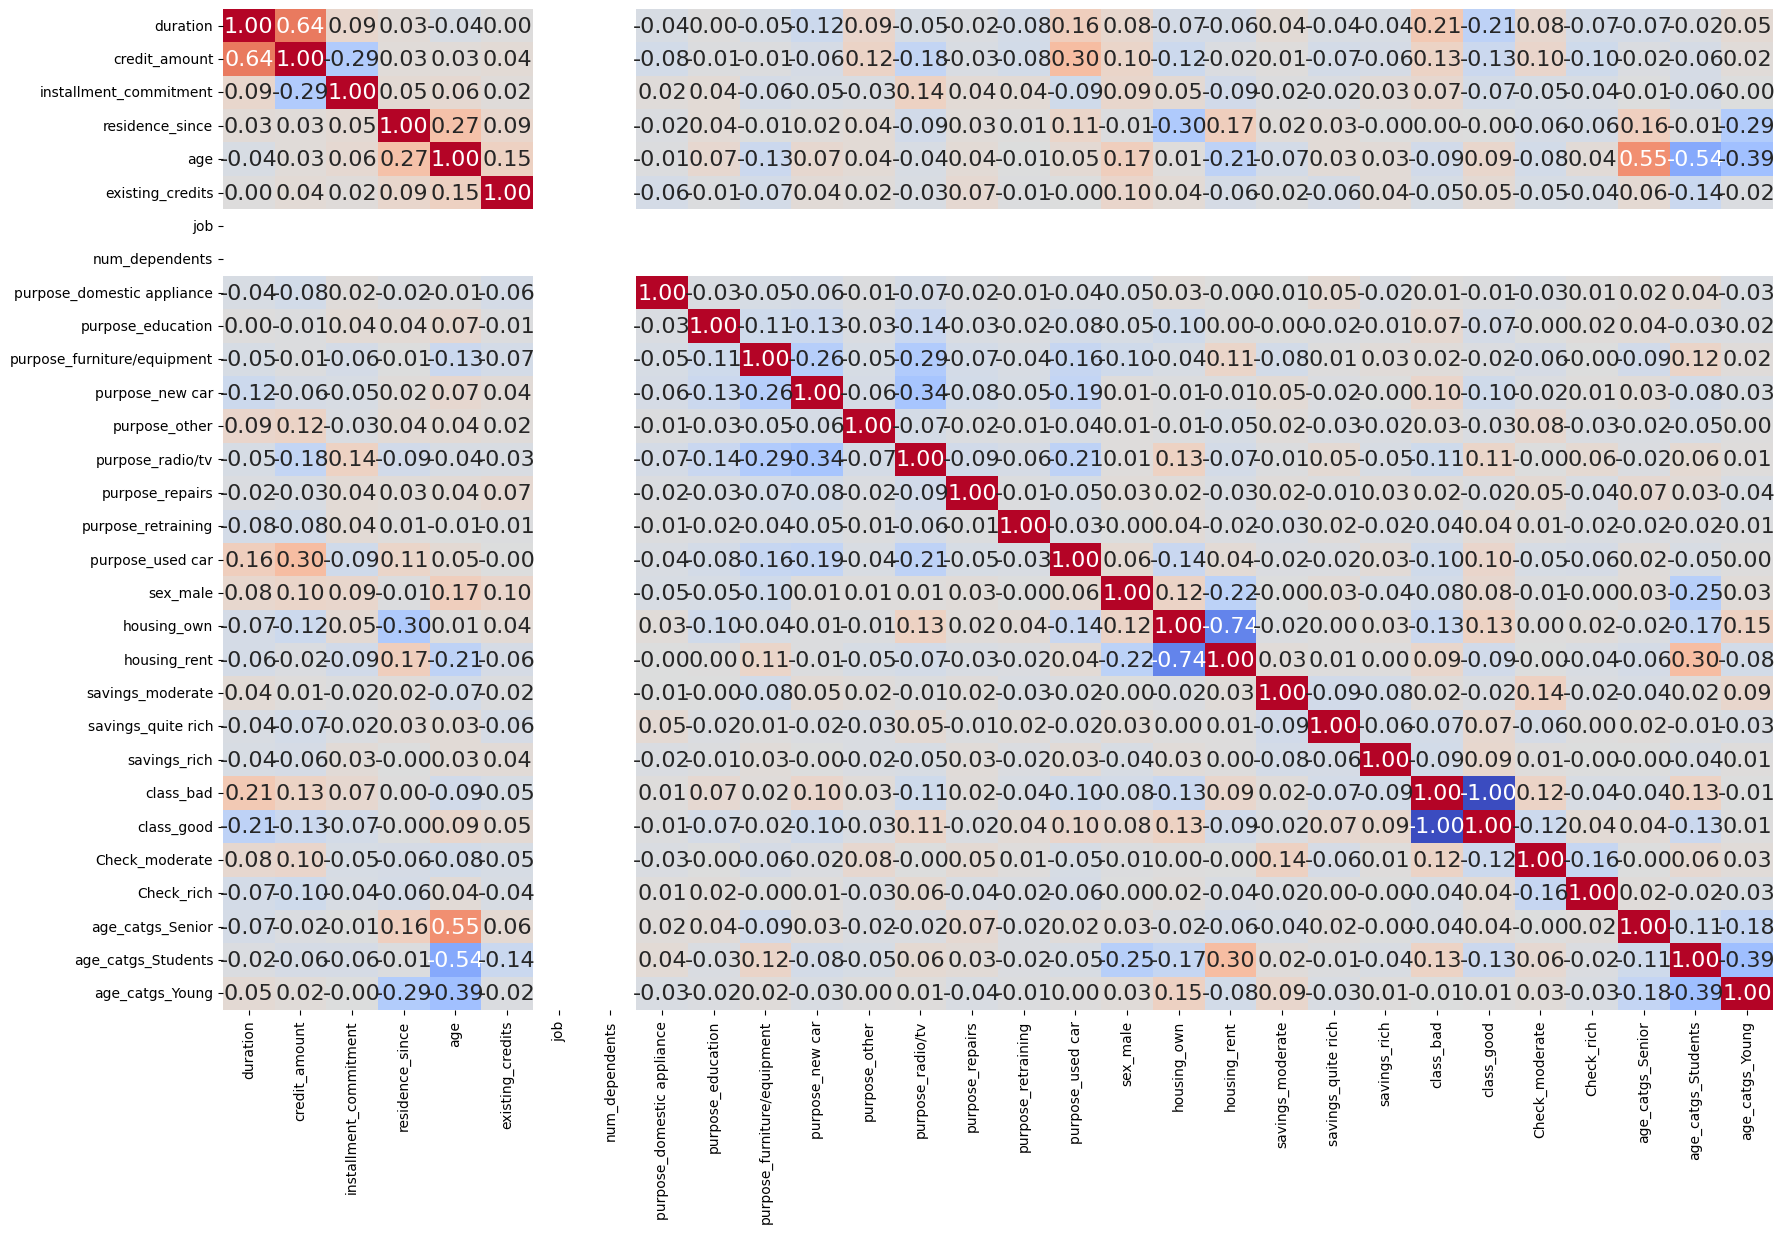

In [ ]:
plt.figure(figsize=(20,13))
sns.heatmap(df.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

Divide tu dataset en subsets de entrenamiento, validación y test o haz K-fold.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_norm, y, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=seed)

**Victor Anderson Jamanca Vargas**

# **Modelo base**

Comienza tu trabajo definiendo un modelo base:

1.   El modelo base debe ser medianamente adecuado, no simplemente el primero que planteemos, no en precisión sino en adecuación al caso previsto.

2.   Evalúa el modelo:
*   Representa sus métricas.
*   Comprueba sus residuos.
*   Comprueba si sufre desvianza o sobre-ajuste.

3.  Para cada hipótesis o experimento, compara tus resultados entre sí y contra el modelo base, para comprobar su estás mejorando o no.

# K-Nearest Neighborhood

In [ ]:
def exec_knn(k_n, X_train_, y_train_, X_test_,y_test_,X_val_, y_val_):

  k_values = list(range(1, k_n))

  train_accs = []
  test_accs = []

  for k in k_values:
      knn_model = KNeighborsClassifier(n_neighbors = k, weights='uniform', metric= 'euclidean')
      knn_model.fit(X_train_, y_train_)

      y_pred = knn_model.predict(X_test_)

      knn_model_train_acc = accuracy_score(y_train_, knn_model.predict(X_train_))
      knn_model_test_acc = accuracy_score(y_test_, y_pred)

      train_accs.append(knn_model_train_acc)
      test_accs.append(knn_model_test_acc)

      print("k_values: ", k)
      print("Training Accuracy: ", knn_model_train_acc)
      print("Testing Accuracy: ", knn_model_test_acc)

      #print(confusion_matrix(y_test, y_pred))
      #print(classification_report(y_test, y_pred))

      best_k_index = test_accs.index(max(test_accs))
      best_k = k_values[best_k_index]

  print("\nMejor resultado:")
  print("Mejor valor de k:", best_k)
  print("Precisión en el conjunto de entrenamiento:", train_accs[best_k_index])
  print("Precisión en el conjunto de prueba:", test_accs[best_k_index])

  # Crear subplots
  fig = make_subplots(rows=2, cols=1, subplot_titles=["Training Accuracy", "Testing Accuracy"])

  # Añadir trazas al primer subplot (Training Accuracy)
  fig.add_trace(go.Scatter(x=k_values, y=train_accs, mode='lines+markers', name='Training Accuracy'), row=1, col=1)

  # Añadir trazas al segundo subplot (Testing Accuracy)
  fig.add_trace(go.Scatter(x=k_values, y=test_accs, mode='lines+markers', name='Testing Accuracy'), row=2, col=1)

  # Actualizar el diseño del gráfico
  fig.update_layout(title_text='Accuracy vs Number of Neighbors (k)', xaxis_title='Number of Neighbors (k)', yaxis_title='Accuracy')

  # Mostrar el gráfico
  py.iplot(fig)

  #Comprobar residuso
  best_knn_model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', metric='euclidean')
  best_knn_model.fit(X_train_, y_train_)

  y_pred_best = best_knn_model.predict(X_test_)

  residuos = y_test_ - y_pred_best

  print("Residuos: ", residuos)

  # Graficar los residuos
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7)
  plt.axhline(0, color='black', linestyle='--', linewidth=2)
  plt.title('Residuos en el Conjunto de Prueba')
  plt.xlabel('Índice de la Muestra')
  plt.ylabel('Residuos')
  plt.show()

  # Entrenar el modelo k-NN
  knn_model = KNeighborsClassifier(n_neighbors=best_k)  # Puedes ajustar el número de vecinos (n_neighbors) según tus necesidades
  knn_model.fit(X_train_, y_train_)

  # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
  Y_train_pred = knn_model.predict(X_train_)
  Y_val_pred = knn_model.predict(X_val_)
  Y_test_pred = knn_model.predict(X_test_)

  # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
  accuracy_train = accuracy_score(y_train_, Y_train_pred)
  accuracy_val = accuracy_score(y_val_, Y_val_pred)
  accuracy_test = accuracy_score(y_test_, Y_test_pred)

  print(f"Precisión en el conjunto de entrenamiento: {accuracy_train}")
  print(f"Precisión en el conjunto de validación: {accuracy_val}")
  print(f"Precisión en el conjunto de prueba: {accuracy_test}")

  # Analizar la precisión para detectar desviación, sobreajuste o generalización adecuada
  if accuracy_train < accuracy_val:
      print("Posible problema de desviación (underfitting)")
  elif accuracy_train > accuracy_val:
      print("Posible problema de sobreajuste (overfitting)")
  else:
      print("El modelo parece estar generalizando de manera adecuada")


k_values:  1
Training Accuracy:  1.0
Testing Accuracy:  0.675
k_values:  2
Training Accuracy:  0.82875
Testing Accuracy:  0.7
k_values:  3
Training Accuracy:  0.82375
Testing Accuracy:  0.7625
k_values:  4
Training Accuracy:  0.7775
Testing Accuracy:  0.7125
k_values:  5
Training Accuracy:  0.7825
Testing Accuracy:  0.65
k_values:  6
Training Accuracy:  0.75625
Testing Accuracy:  0.6625
k_values:  7
Training Accuracy:  0.76125
Testing Accuracy:  0.6875
k_values:  8
Training Accuracy:  0.74125
Testing Accuracy:  0.6625
k_values:  9
Training Accuracy:  0.75375
Testing Accuracy:  0.675
k_values:  10
Training Accuracy:  0.74125
Testing Accuracy:  0.675
k_values:  11
Training Accuracy:  0.7375
Testing Accuracy:  0.6625
k_values:  12
Training Accuracy:  0.7325
Testing Accuracy:  0.6875
k_values:  13
Training Accuracy:  0.73625
Testing Accuracy:  0.7
k_values:  14
Training Accuracy:  0.72875
Testing Accuracy:  0.7
k_values:  15
Training Accuracy:  0.73125
Testing Accuracy:  0.6875
k_values:  

Residuos:  [  0   0   0   0   0   0   0   1   0   0 255 255   0   1   0   0   0   0
   0   0   1   0   0 255   0   1   0   0   0   0   1   0   0   0   0   0
   0   0   0   1   0   1   1   0   0   0   0   1   0   0   1   1   0   1
   0   0   0   0   1   0   1   0   0   0   0   0   0   0   0 255   0   0
   0   0   0   0   1   0   0   0]


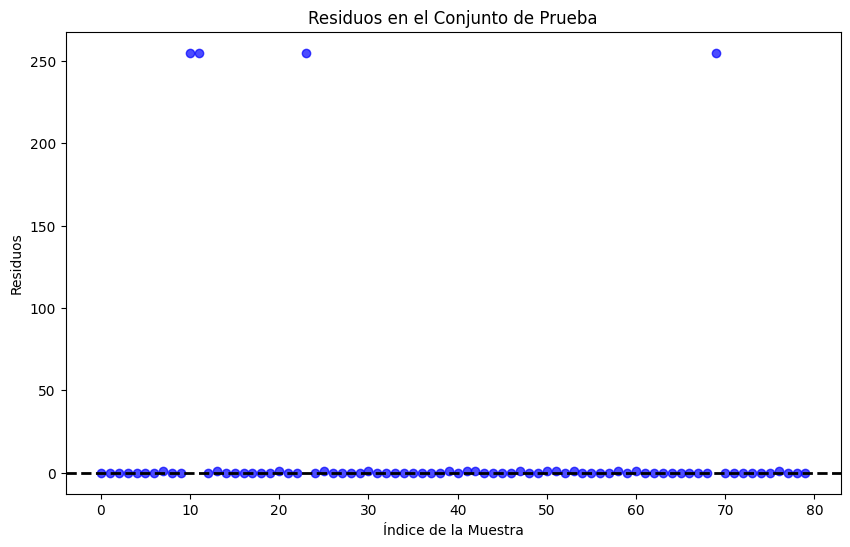

Precisión en el conjunto de entrenamiento: 0.82375
Precisión en el conjunto de validación: 0.7
Precisión en el conjunto de prueba: 0.7625
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_knn(41, X_train, y_train, X_test,y_test,X_val, y_val)

**Victor Anderson Jamanca Vargas**

# **Ingeniería de características**

Parte de los datos base y realiza experimentos o hipótesis para mejorar tus características.

Cuando no sepas cómo avanzar con tu modelo, puedes volver al punto de partida y mejorar en su lugar las características utilizadas:

1.   Evalúa la relevancia de las características tras entrenar tus modelos.
2.   Plantea algunas mejoras, como proponer polinomios de distinto grado (no más de 4/5), logaritmos, cruces entre variables, etc.
3.   Plantea PCA o reduce las características si la dimensionalidad/complejidad del modelo es muy alta.
4.   Incorpora nuevas características



In [ ]:
# Definir el mapeo de categorías
categorias = {
    '>=7': 'Experimentado',
    '1<=X<4': 'Medio',
    '4<=X<7': 'Intermedio',
    'unemployed': 'Desempleado',
    '<1': 'Principiante'
}

df['employment'] = df['employment'].replace(categorias)

print(df)

    checking_status  duration                  credit_history  \
0            little       6.0  critical/other existing credit   
1          moderate      42.0                   existing paid   
2            little      12.0  critical/other existing credit   
3            little      42.0                   existing paid   
4            little      24.0              delayed previously   
..              ...       ...                             ...   
995          little      12.0                   existing paid   
996          little      30.0                   existing paid   
997          little      12.0                   existing paid   
998          little      42.0                   existing paid   
999        moderate      42.0  critical/other existing credit   

                 purpose  credit_amount savings_status     employment  \
0               radio/tv         1169.0         little  Experimentado   
1               radio/tv         5951.0         little          Medio   


In [ ]:
#df = df.merge(pd.get_dummies(df.employment, drop_first=True, prefix='employment'), left_index=True, right_index=True)

In [ ]:
df

checking_status  duration                  credit_history  \
0            little       6.0  critical/other existing credit   
1          moderate      42.0                   existing paid   
2            little      12.0  critical/other existing credit   
3            little      42.0                   existing paid   
4            little      24.0              delayed previously   
..              ...       ...                             ...   
995          little      12.0                   existing paid   
996          little      30.0                   existing paid   
997          little      12.0                   existing paid   
998          little      42.0                   existing paid   
999        moderate      42.0  critical/other existing credit   

                 purpose  credit_amount savings_status     employment  \
0               radio/tv         1169.0         little  Experimentado   
1               radio/tv         5951.0         little          Medio   
2              education         2096.0         little     Intermedio   
3    furniture/equipment         7882.0         little     Intermedio   
4                new car         4870.0         little          Medio   
..                   ...            ...            ...            ...   
995  furniture/equipment         1736.0         little     Intermedio   
996             used car         3857.0         little          Medio   
997             radio/tv          804.0         little  Experimentado   
998             radio/tv         1845.0         little          Medio   
999             used car         4576.0       moderate    Desempleado   

     installment_commitment     personal_status other_parties  \
0                       4.0         male single          none   
1                       2.0  female div/dep/mar          none   
2                       2.0         male single          none   
3                       2.0         male single     guarantor   
4                       3.0         male single          none   
..                      ...                 ...           ...   
995                     3.0  female div/dep/mar          none   
996                     4.0        male div/sep          none   
997                     4.0         male single          none   
998                     4.0         male single          none   
999                     3.0         male single          none   

     residence_since property_magnitude   age other_payment_plans   housing  \
0                4.0        real estate  64.5                none       own   
1                2.0        real estate  22.0                none       own   
2                3.0        real estate  49.0                none       own   
3                4.0     life insurance  45.0                none  for free   
4                4.0  no known property  53.0                none  for free   
..               ...                ...   ...                 ...       ...   
995              4.0        real estate  31.0                none       own   
996              4.0     life insurance  40.0                none       own   
997              4.0                car  38.0                none       own   
998              4.0  no known property  23.0                none  for free   
999              4.0                car  27.0                none       own   

     existing_credits  job  num_dependents own_telephone foreign_worker class  \
0                 2.0    2             1.0           yes            yes  good   
1                 1.0    2             1.0          none            yes   bad   
2                 1.0    2             1.0          none            yes  good   
3                 1.0    2             1.0          none            yes  good   
4                 2.0    2             1.0          none            yes   bad   
..                ...  ...             ...           ...            ...   ...   
995               1.0    2             1.0       

In [ ]:
droplist2=["sex","housing","savings_status","checking_status","purpose","class","age_catgs",#'duration','credit_amount',
          'own_telephone', 'foreign_worker', 'other_parties', 'num_dependents', 'other_payment_plans', 'class_good',
          'employment','credit_history', 'personal_status', 'property_magnitude', 'marital_status', 'residence_since',
           #'purpose_domestic appliance','purpose_education','purpose_furniture/equipment','purpose_new car','purpose_other',
           #'purpose_radio/tv','purpose_repairs','purpose_retraining','purpose_used car','sex_male',
           ]
df2 = df.drop(droplist2, axis= 1)

In [ ]:
df2

duration  credit_amount  installment_commitment   age  existing_credits  \
0         6.0         1169.0                     4.0  64.5               2.0   
1        42.0         5951.0                     2.0  22.0               1.0   
2        12.0         2096.0                     2.0  49.0               1.0   
3        42.0         7882.0                     2.0  45.0               1.0   
4        24.0         4870.0                     3.0  53.0               2.0   
..        ...            ...                     ...   ...               ...   
995      12.0         1736.0                     3.0  31.0               1.0   
996      30.0         3857.0                     4.0  40.0               1.0   
997      12.0          804.0                     4.0  38.0               1.0   
998      42.0         1845.0                     4.0  23.0               1.0   
999      42.0         4576.0                     3.0  27.0               1.0   

     job  purpose_domestic appliance  purpose_education  \
0      2                           0                  0   
1      2                           0                  0   
2      2                           0                  1   
3      2                           0                  0   
4      2                           0                  0   
..   ...                         ...                ...   
995    2                           0                  0   
996    2                           0                  0   
997    2                           0                  0   
998    2                           0                  0   
999    2                           0                  0   

     purpose_furniture/equipment  purpose_new car  purpose_other  \
0                              0                0              0   
1                              0                0              0   
2                              0                0              0   
3                              1                0              0   
4                              0                1              0   
..                           ...              ...            ...   
995                            1                0              0   
996                            0                0              0   
997                            0                0              0   
998                            0                0              0   
999                            0                0              0   

     purpose_radio/tv  purpose_repairs  purpose_retraining  purpose_used car  \
0                   1                0                   0                 0   
1                   1                0                   0                 0   
2                   0                0                   0                 0   
3                   0                0                   0                 0   
4                   0                0                   0                 0   
..                ...              ...                 ...               ...   
995                 0                0                   0                 0   
996                 0                0                   0                 1   
997                 1                0                   0                 0   
998                 1                0                   0                 0   
999                 0                0                   0                 1   

     sex_male  housing_own  housing_rent  savings_moderate  \
0           1            1             0                 0   
1           0            1             0                 0   
2           1            1             0                 0   
3           1            0             0                 0   
4           1            0             0                 0   
..        ...          ...           ...               ...   
995         0            1             0                 0   
996         1            1             0                 0   

In [ ]:
#Transformacion logaritmica solo a credit_amount
df2['credit_amount'] = np.log(df['credit_amount'])

df2['existing_credits'] = np.log(df['existing_credits'])

df2['age'] = np.log(df['age'])

df2['duration'] = np.log(df['duration'])

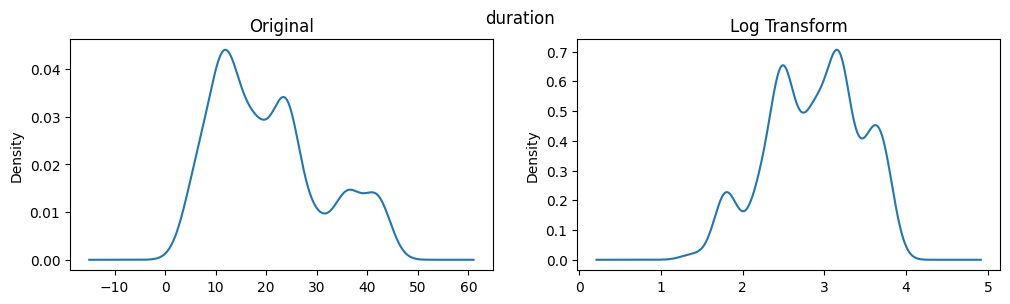

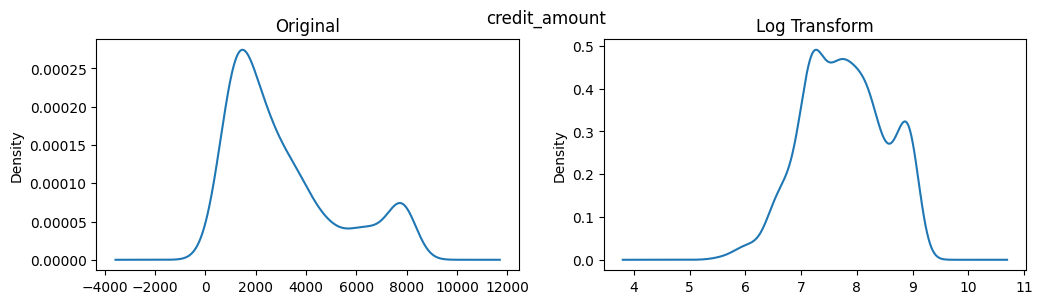

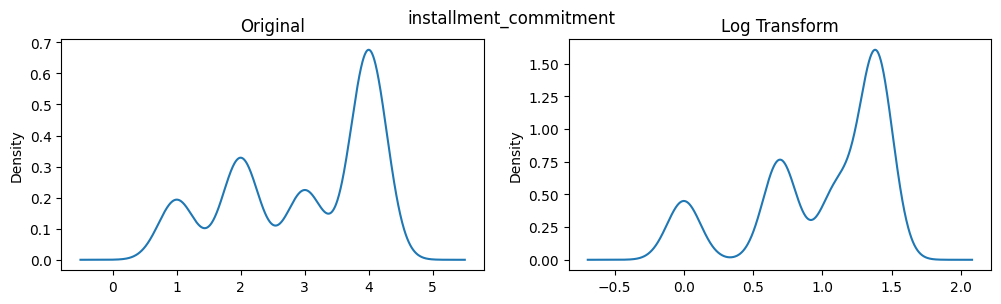

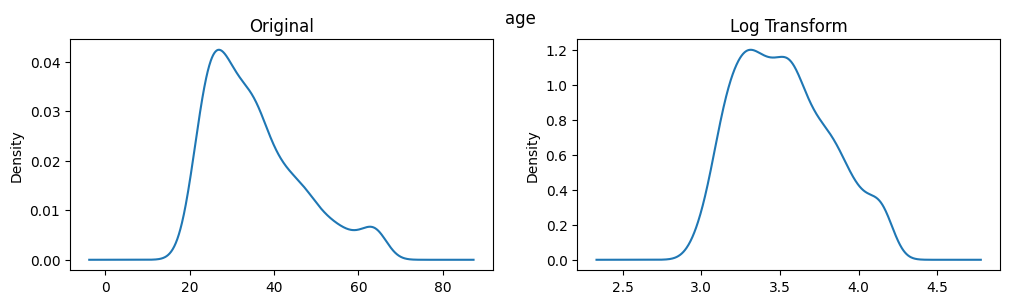

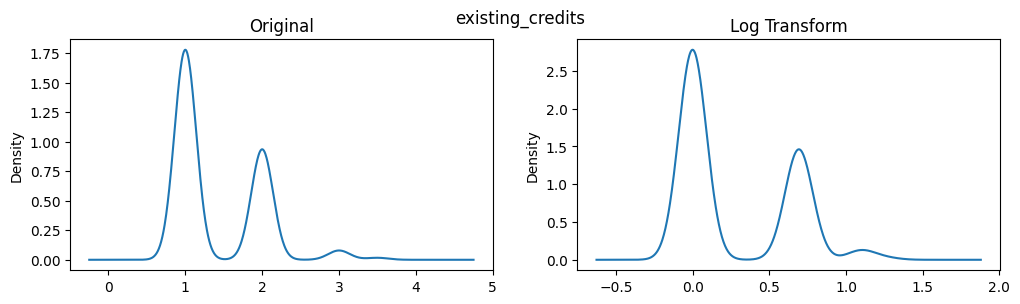

In [ ]:
col = ['duration', 'credit_amount','installment_commitment','age','existing_credits']

for num_col in col:
  fig, ax =plt.subplots(1,2)

  df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
  np.log(df[num_col]).plot.density(figsize=(12, 3), grid=False, ax=ax[1])

  ax[0].title.set_text('Original')
  ax[1].title.set_text('Log Transform')
  ax[0].set_ylabel('Density')
  fig.suptitle(num_col)
  plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

In [ ]:
numerical_columns = ['age', 'credit_amount', 'duration']

In [ ]:
X_2 = df2.drop('class_bad', 1)
y_2 = df2['class_bad']

<ipython-input-303-1dad06340376>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
X_2, y_2 = shuffle(X_2, y_2, random_state=seed)

In [ ]:
X_2

duration  credit_amount  installment_commitment       age  \
521  2.890372       8.067776                     2.0  3.178054   
737  2.890372       8.384804                     3.0  3.555348   
740  3.178054       7.751475                     2.0  3.465736   
660  2.484907       7.167809                     3.0  3.135494   
411  3.496508       8.889170                     3.0  3.555348   
..        ...            ...                     ...       ...   
106  2.890372       8.773075                     2.0  3.663562   
270  2.890372       7.886833                     4.0  3.465736   
860  3.178054       8.666303                     4.0  3.295837   
435  2.484907       7.302496                     2.0  3.218876   
102  1.791759       6.837333                     3.0  3.178054   

     existing_credits  job  purpose_domestic appliance  purpose_education  \
521          0.000000    2                           0                  0   
737          0.000000    2                           0                  0   
740          0.000000    2                           0                  0   
660          0.000000    2                           0                  0   
411          0.693147    2                           0                  0   
..                ...  ...                         ...                ...   
106          0.693147    2                           0                  0   
270          0.000000    2                           0                  0   
860          0.693147    2                           0                  0   
435          0.000000    2                           0                  0   
102          0.000000    2                           0                  0   

     purpose_furniture/equipment  purpose_new car  purpose_other  \
521                            0                0              0   
737                            0                1              0   
740                            0                1              0   
660                            0                0              0   
411                            0                0              0   
..                           ...              ...            ...   
106                            0                1              0   
270                            0                1              0   
860                            0                0              0   
435                            0                0              0   
102                            0                0              0   

     purpose_radio/tv  purpose_repairs  purpose_retraining  purpose_used car  \
521                 1                0                   0                 0   
737                 0                0                   0                 0   
740                 0                0                   0                 0   
660                 1                0                   0                 0   
411                 0                0                   0                 1   
..                ...              ...                 ...               ...   
106                 0                0                   0                 0   
270                 0                0                   0                 0   
860                 0                0                   0                 1   
435                 1                0                   0                 0   
102                 1                0                   0                 0   

     sex_male  housing_own  housing_rent  savings_moderate  \
521         0            1             0                 0   
737         1            1             0                 1   
740         1            1             0                 1   
660         1            0             1                 0   
411         1            1             0                 0   
..        ...          ...           ...               ...   
106         1            1             0                 0   
270         1

In [ ]:
# Create a scaler object
scaler = StandardScaler()

# Apply the scaler only to the numerical columns of the DataFrame copy
X_2[numerical_columns] = scaler.fit_transform(X_2[numerical_columns])

# Print the new DataFrame to verify
print(X_2.head())

     duration  credit_amount  installment_commitment       age  \
521  0.046223       0.409632                     2.0 -1.163512   
737  0.046223       0.841056                     3.0  0.109309   
740  0.559655      -0.020804                     2.0 -0.193002   
660 -0.677419      -0.815081                     3.0 -1.307089   
411  1.128005       1.527419                     3.0  0.109309   

     existing_credits  job  purpose_domestic appliance  purpose_education  \
521          0.000000    2                           0                  0   
737          0.000000    2                           0                  0   
740          0.000000    2                           0                  0   
660          0.000000    2                           0                  0   
411          0.693147    2                           0                  0   

     purpose_furniture/equipment  purpose_new car  purpose_other  \
521                            0                0              0   
737 

In [ ]:
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_2, y, test_size=0.2, random_state=seed)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.4, random_state=seed)

In [ ]:
# Aplicar NCA
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=seed)
X_train_nca = nca.fit_transform(X_train_2, y_train)
X_val_nca = nca.transform(X_val_2)
X_test_nca = nca.transform(X_test_2)

In [ ]:
# Aplicar PCA
pca = PCA(n_components=0.70, random_state=seed)  # Puedes ajustar el umbral de varianza explicada
X_train_pca = pca.fit_transform(X_train_2)
X_val_pca = pca.transform(X_val_2)
X_test_pca = pca.transform(X_test_2)

k_values:  1
Training Accuracy:  1.0
Testing Accuracy:  0.6625
k_values:  2
Training Accuracy:  0.81375
Testing Accuracy:  0.6375
k_values:  3
Training Accuracy:  0.82625
Testing Accuracy:  0.6125
k_values:  4
Training Accuracy:  0.77875
Testing Accuracy:  0.6875
k_values:  5
Training Accuracy:  0.78
Testing Accuracy:  0.6875
k_values:  6
Training Accuracy:  0.76375
Testing Accuracy:  0.6875
k_values:  7
Training Accuracy:  0.7675
Testing Accuracy:  0.65
k_values:  8
Training Accuracy:  0.75625
Testing Accuracy:  0.6875
k_values:  9
Training Accuracy:  0.7575
Testing Accuracy:  0.675
k_values:  10
Training Accuracy:  0.745
Testing Accuracy:  0.675
k_values:  11
Training Accuracy:  0.74375
Testing Accuracy:  0.6625
k_values:  12
Training Accuracy:  0.72875
Testing Accuracy:  0.6625
k_values:  13
Training Accuracy:  0.74
Testing Accuracy:  0.6625
k_values:  14
Training Accuracy:  0.735
Testing Accuracy:  0.65
k_values:  15
Training Accuracy:  0.7475
Testing Accuracy:  0.65
k_values:  16


Residuos:  [  0   0   1   0   0 255   0   1 255   0 255   0   0   1   0   0   0   0
   0   0   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0   0
   0   1   0   1   0   1   1   0   0   0   0   1   0   1   1   1   0   1
   1   0   0   0   1   1   1   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   0   1   0   0   0]


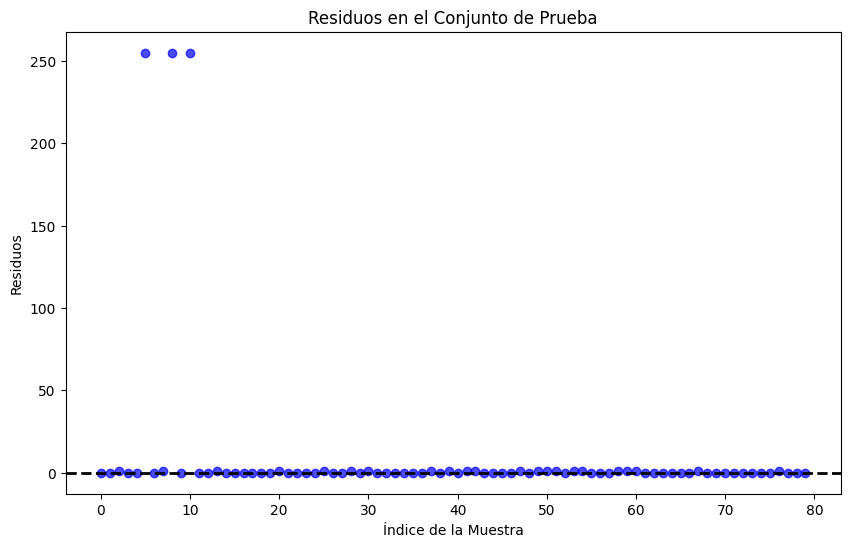

Precisión en el conjunto de entrenamiento: 0.77875
Precisión en el conjunto de validación: 0.6916666666666667
Precisión en el conjunto de prueba: 0.6875
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_knn(41, X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

k_values:  1
Training Accuracy:  1.0
Testing Accuracy:  0.6625
k_values:  2
Training Accuracy:  0.8075
Testing Accuracy:  0.6625
k_values:  3
Training Accuracy:  0.80125
Testing Accuracy:  0.7
k_values:  4
Training Accuracy:  0.7575
Testing Accuracy:  0.675
k_values:  5
Training Accuracy:  0.75875
Testing Accuracy:  0.65
k_values:  6
Training Accuracy:  0.7475
Testing Accuracy:  0.6625
k_values:  7
Training Accuracy:  0.75125
Testing Accuracy:  0.7375
k_values:  8
Training Accuracy:  0.74375
Testing Accuracy:  0.6875
k_values:  9
Training Accuracy:  0.7475
Testing Accuracy:  0.7125
k_values:  10
Training Accuracy:  0.7475
Testing Accuracy:  0.6875
k_values:  11
Training Accuracy:  0.74875
Testing Accuracy:  0.7
k_values:  12
Training Accuracy:  0.75
Testing Accuracy:  0.6625
k_values:  13
Training Accuracy:  0.7425
Testing Accuracy:  0.7125
k_values:  14
Training Accuracy:  0.7375
Testing Accuracy:  0.7
k_values:  15
Training Accuracy:  0.735
Testing Accuracy:  0.7125
k_values:  16
Tra

Residuos:  [  0   0   1   0   0   0   0   1   0   1 255   0   0   1   0   0   0   0
   0   0   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0 255
   0   1   0   0   0   0   1   0   0   0   1   1   0   0   1   1   0   1
   1   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0]


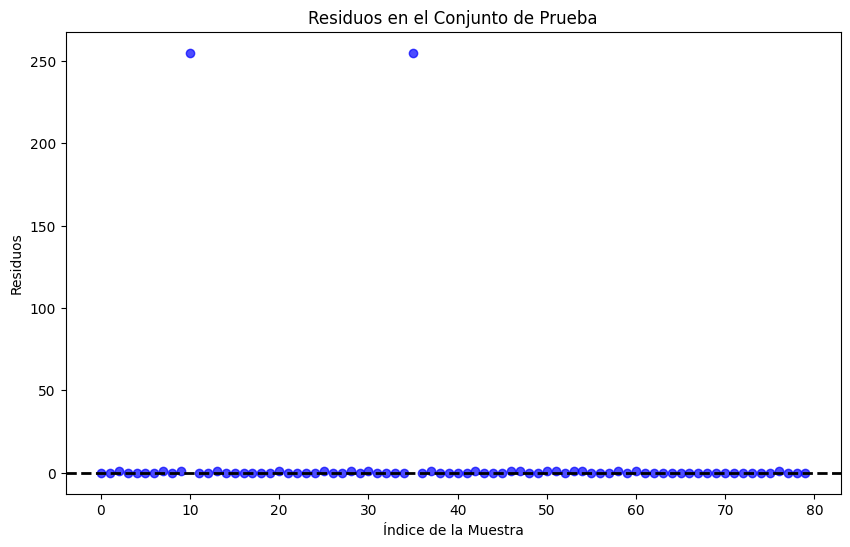

Precisión en el conjunto de entrenamiento: 0.75125
Precisión en el conjunto de validación: 0.6666666666666666
Precisión en el conjunto de prueba: 0.7375
Posible problema de sobreajuste (overfitting)


In [ ]:
#exec_knn(41, X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)
exec_knn(41, X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2)
#exec_knn(41, X_train_nca, y_train_2, X_test_nca,y_test_2,X_val_nca, y_val_2)

**Victor Anderson Jamanca Vargas**

# **Refinado del modelo**

Comienza a plantear y refinar tus modelos:

* Prueba distintas familias de modelos relacionados con tu caso de uso: árboles de decisión, modelos lineales, SVM/SVRs, etc.
* Prueba distintos tipos de modelos dentro de las familias.
* Avanza planteando hipótesis o experimentos, evaluando y comentando los resultados.
* Continua mejorando tu modelo de una forma iterativa, planteando unas posibilidades, explorándolas, y avanzando sobre la más prometedora, ahondando en la misma.
* Evalúa cada modelo o experimento planteado:
* Plantea cada modelo como una nueva versión, con un nombre descriptivo y versionado.
* Métricas escogidas.
* Tiempo de entrenamiento.
* Sufre desviación o sobre-ajuste.
* Comparación con otros modelos del mismo experimento y con el modelo base.
* Prueba métodos más avanzados si lo consideras necesario:
* Volver al paso de extracción de características.
* PCA y reducción de dimensionalidad.
* Optimización de hiper-parámetros: ratio de entrenamiento, regularización, etc.
* GridSearch, algoritmos genéticos
* Ensamblajes

In [ ]:
def exec_model_refinado(model, X_train_, y_train_, X_test_,y_test_,X_val_, y_val_, num=None):

  if num is None:
    num = 1
  n_values = list(range(1, num))
  accuracy = []
  y_predd = []
  train_accs = []
  test_accs = []
  residuoss = []
  accuracy_ = []
  y_pred_bestt = []

  best_n = 0
  best_accuracy = 0

  if(model == 'svc'):

    svc_model = SVC()
    svc_model.fit(X_train_, y_train_)

    y_pred = svc_model.predict(X_test_)

    y_val_pred = svc_model.predict(X_val_)

    svc_model_train_acc = accuracy_score(y_train_, svc_model.predict(X_train_))
    svc_model_test_acc = accuracy_score(y_test_, y_pred)
    svc_model_val_acc = accuracy_score(y_val_, y_val_pred)

    accuracy.append(svc_model_train_acc)
    accuracy.append(svc_model_test_acc)
    accuracy.append(svc_model_val_acc)
    y_predd.append(y_pred)

  elif(model == 'dtc'):
    for n in n_values:
      decision_tree_model = DecisionTreeClassifier(max_depth=n)
      decision_tree_model.fit(X_train_, y_train_)

      y_pred = decision_tree_model.predict(X_test_)

      decision_tree_model_train_acc = accuracy_score(y_train_, decision_tree_model.predict(X_train_))
      decision_tree_model_test_acc = accuracy_score(y_test_, y_pred)

      accuracy.append(decision_tree_model_train_acc)
      accuracy.append(decision_tree_model_test_acc)

      train_accs.append(decision_tree_model_train_acc)
      test_accs.append(decision_tree_model_test_acc)

      best_n_index = test_accs.index(max(test_accs))
      best_n = n_values[best_n_index]

      y_predd.append(y_pred)

    #Comprobar residuso
    best_n_model = DecisionTreeClassifier(max_depth=best_n)
    best_n_model.fit(X_train_, y_train_)

    y_pred_best = best_n_model.predict(X_test_)
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = best_n_model.predict(X_train_)
    Y_val_pred = best_n_model.predict(X_val_)
    Y_test_pred = best_n_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)


  elif(model == 'rfc'):
    for n in n_values:
      rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = n, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=20)
      rf_model.fit(X_train_, y_train_)

      y_pred = rf_model.predict(X_test_)

      rf_model_train_acc = accuracy_score(y_train_, rf_model.predict(X_train_))
      rf_model_test_acc = accuracy_score(y_test_, y_pred)

      accuracy.append(rf_model_train_acc)
      accuracy.append(rf_model_test_acc)

      train_accs.append(rf_model_train_acc)
      test_accs.append(rf_model_test_acc)

      best_n_index = test_accs.index(max(test_accs))
      best_n = n_values[best_n_index]

      y_predd.append(y_pred)

    #Comprobar residuso
    best_n_model = RandomForestClassifier(criterion = 'entropy', max_depth = best_n, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=20)
    best_n_model.fit(X_train_, y_train_)

    y_pred_best = best_n_model.predict(X_test_)
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = best_n_model.predict(X_train_)
    Y_val_pred = best_n_model.predict(X_val_)
    Y_test_pred = best_n_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'gbc'):
    for n in n_values:
      gb = GradientBoostingClassifier(n_estimators=20, max_depth= n , min_samples_split=3, min_samples_leaf=1, subsample=1.0)

      gb.fit(X_train_, y_train_)

      y_pred = gb.predict(X_test_)

      gb_model_train_acc = accuracy_score(y_train_, gb.predict(X_train_))
      gb_model_test_acc = accuracy_score(y_test_, y_pred)

      accuracy.append(gb_model_train_acc)
      accuracy.append(gb_model_test_acc)

      train_accs.append(gb_model_train_acc)
      test_accs.append(gb_model_test_acc)

      best_n_index = test_accs.index(max(test_accs))
      best_n = n_values[best_n_index]

      y_predd.append(y_pred)

    #Comprobar residuso
    best_n_model = GradientBoostingClassifier(n_estimators=20, max_depth= best_n , min_samples_split=3, min_samples_leaf=1, subsample=1.0)
    best_n_model.fit(X_train_, y_train_)

    y_pred_best = best_n_model.predict(X_test_)
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = best_n_model.predict(X_train_)
    Y_val_pred = best_n_model.predict(X_val_)
    Y_test_pred = best_n_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)


  elif(model == 'sgd'):
    for n in n_values:
      sgb = GradientBoostingClassifier(n_estimators=100, max_depth=n, min_samples_split=2, min_samples_leaf=1, subsample=0.90, random_state=seed, max_features = 0.70)
      sgb.fit(X_train_, y_train_)

      y_pred = sgb.predict(X_test_)

      sgb_model_train_acc = accuracy_score(y_train_, sgb.predict(X_train_))
      sgb_model_test_acc = accuracy_score(y_test_, y_pred)

      accuracy.append(sgb_model_train_acc)
      accuracy.append(sgb_model_test_acc)

      train_accs.append(sgb_model_train_acc)
      test_accs.append(sgb_model_test_acc)

      best_n_index = test_accs.index(max(test_accs))
      best_n = n_values[best_n_index]

      y_predd.append(y_pred)

    #Comprobar residuso

    best_n_model = GradientBoostingClassifier(n_estimators=100, max_depth=best_n, min_samples_split=2, min_samples_leaf=1, subsample=0.90, random_state=seed, max_features = 0.70)
    best_n_model.fit(X_train_, y_train_)

    y_pred_best = best_n_model.predict(X_test_)
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = best_n_model.predict(X_train_)
    Y_val_pred = best_n_model.predict(X_val_)
    Y_test_pred = best_n_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'xgb'):

    # Inicializar y ajustar el LabelEncoder en el conjunto de entrenamiento
    le = LabelEncoder()
    y_train_ = le.fit_transform(y_train_)

    # Utilizar el mismo LabelEncoder para transformar el conjunto de prueba
    y_test_ = le.transform(y_test_)

    for n in n_values:

      xgb = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=n,min_child_weight=1,subsample=1,colsample_bytree=1,objective='binary:logistic', random_state=seed)
      xgb.fit(X_train_, y_train_)

      y_pred = xgb.predict(X_test_)

      xgb_model_train_acc = accuracy_score(y_train_, xgb.predict(X_train_))
      xgb_model_test_acc = accuracy_score(y_test_, y_pred)

      accuracy.append(xgb_model_train_acc)
      accuracy.append(xgb_model_test_acc)

      train_accs.append(xgb_model_train_acc)
      test_accs.append(xgb_model_test_acc)

      best_n_index = test_accs.index(max(test_accs))
      best_n = n_values[best_n_index]

      y_predd.append(y_pred)

    #Comprobar residuso
    best_n_model = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=best_n,min_child_weight=1,subsample=1,colsample_bytree=1,objective='binary:logistic', random_state=seed)
    best_n_model.fit(X_train_, y_train_)

    y_pred_best = best_n_model.predict(X_test_)
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = best_n_model.predict(X_train_)
    Y_val_pred = best_n_model.predict(X_val_)
    Y_test_pred = best_n_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'cbc'):
    for n in n_values:

      cat = CatBoostClassifier(iterations=n)
      cat.fit(X_train_, y_train_, eval_set=(X_val_, y_val_))

      y_pred = cat.predict(X_test_)

      cat_model_train_acc = accuracy_score(y_train_, cat.predict(X_train_))
      cat_model_test_acc = accuracy_score(y_test_, y_pred)

      accuracy.append(cat_model_train_acc)
      accuracy.append(cat_model_test_acc)

      train_accs.append(cat_model_train_acc)
      test_accs.append(cat_model_test_acc)

      best_n_index = test_accs.index(max(test_accs))
      best_n = n_values[best_n_index]

      y_predd.append(y_pred)

    #Comprobar residuso
    print("Comprobar CatBoost: ")
    best_n_model = CatBoostClassifier(iterations=best_n)
    best_n_model.fit(X_train_, y_train_)

    y_pred_best = best_n_model.predict(X_test_)
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = best_n_model.predict(X_train_)
    Y_val_pred = best_n_model.predict(X_val_)
    Y_test_pred = best_n_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'etc'):
      for n in n_values:

        etc = ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=n,min_samples_split=2,min_samples_leaf=1,max_features='auto',random_state=seed)
        etc.fit(X_train_, y_train_)

        y_pred = etc.predict(X_test_)

        etc_model_train_acc = accuracy_score(y_train_, etc.predict(X_train_))
        etc_model_test_acc = accuracy_score(y_test_, y_pred)

        accuracy.append(etc_model_train_acc)
        accuracy.append(etc_model_test_acc)

        train_accs.append(etc_model_train_acc)
        test_accs.append(etc_model_test_acc)

        best_n_index = test_accs.index(max(test_accs))
        best_n = n_values[best_n_index]

        y_predd.append(y_pred)

      #Comprobar residuso
      print("Comprobar CatBoost: ")
      best_n_model = ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=best_n,min_samples_split=2,min_samples_leaf=1,max_features='auto',random_state=seed)
      best_n_model.fit(X_train_, y_train_)

      y_pred_best = best_n_model.predict(X_test_)
      y_pred_bestt.append(y_pred_best)

      residuos = y_test_ - y_pred_best
      residuoss.append(residuos)

      # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
      Y_train_pred = best_n_model.predict(X_train_)
      Y_val_pred = best_n_model.predict(X_val_)
      Y_test_pred = best_n_model.predict(X_test_)

      # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
      accuracy_train = accuracy_score(y_train_, Y_train_pred)
      accuracy_val = accuracy_score(y_val_, Y_val_pred)
      accuracy_test = accuracy_score(y_test_, Y_test_pred)

      accuracy_.append(accuracy_train)
      accuracy_.append(accuracy_val)
      accuracy_.append(accuracy_test)

  else:
    # model ...
    pass

  if(num==1):

    print("Training Accuracy: ", accuracy[0])
    print("Testing Accuracy: ", accuracy[1])
    print("Validation Accuracy: ", accuracy[2])

    print(confusion_matrix(y_test_, y_predd[0]))
    print(classification_report(y_test_, y_predd[0]))

  if(num!=1):

    print("\nMejor resultado:")
    print("Mejor valor de n:", best_n)
    print("Precisión en el conjunto de entrenamiento:", train_accs[best_n_index])
    print("Precisión en el conjunto de prueba:", test_accs[best_n_index])

    print(confusion_matrix(y_test_, y_pred_bestt[0]))
    print(classification_report(y_test_, y_pred_bestt[0]))

    # Crear subplots
    fig = make_subplots(rows=2, cols=1, subplot_titles=["Training Accuracy", "Testing Accuracy"])

    # Añadir trazas al primer subplot (Training Accuracy)
    fig.add_trace(go.Scatter(x=n_values, y=train_accs, mode='lines+markers', name='Training Accuracy'), row=1, col=1)

    # Añadir trazas al segundo subplot (Testing Accuracy)
    fig.add_trace(go.Scatter(x=n_values, y=test_accs, mode='lines+markers', name='Testing Accuracy'), row=2, col=1)

    # Actualizar el diseño del gráfico
    fig.update_layout(title_text='Accuracy vs Numbers (n)', xaxis_title='Numbers (n)', yaxis_title='Accuracy')

    # Mostrar el gráfico
    py.iplot(fig)

    #Comprobar residuso
    print("Residuos: ", residuoss[0])

    # Graficar los residuos
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuoss[0])), residuoss[0], color='blue', alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', linewidth=2)
    plt.title('Residuos en el Conjunto de Prueba')
    plt.xlabel('Índice de la Muestra')
    plt.ylabel('Residuos')
    plt.show()

    print(f"Precisión en el conjunto de entrenamiento: {accuracy_[0]}")
    print(f"Precisión en el conjunto de validación: {accuracy_[1]}")
    print(f"Precisión en el conjunto de prueba: {accuracy_[2]}")

    # Analizar la precisión para detectar desviación, sobreajuste o generalización adecuada
    if accuracy_[0] < accuracy_[1]:
        print("Posible problema de desviación (underfitting)")
    elif accuracy_[0] > accuracy_[2]:
        print("Posible problema de sobreajuste (overfitting)")
    else:
        print("El modelo parece estar generalizando de manera adecuada")


**Support Vector Classifier**

In [ ]:
exec_model_refinado('svc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

Training Accuracy:  0.72875
Testing Accuracy:  0.6625
Validation Accuracy:  0.6916666666666667
[[51  0]
 [27  2]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        51
           1       1.00      0.07      0.13        29

    accuracy                           0.66        80
   macro avg       0.83      0.53      0.46        80
weighted avg       0.78      0.66      0.55        80



**Decision Tree Classifier**


Mejor resultado:
Mejor valor de n: 4
Precisión en el conjunto de entrenamiento: 0.7475
Precisión en el conjunto de prueba: 0.6875
[[49  2]
 [23  6]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.80        51
           1       0.75      0.21      0.32        29

    accuracy                           0.69        80
   macro avg       0.72      0.58      0.56        80
weighted avg       0.71      0.69      0.63        80



Residuos:  [  1   0   1   0   0   0 255   1   0   1   0   0   0   1   1   0   1   0
   1   0   1   0   0   0   0   1   1   0   1   0   1   0   0   0   0   0
   0   1   0   1   0   1   1   0   0   0   0   1   0   1   0   0 255   1
   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0]


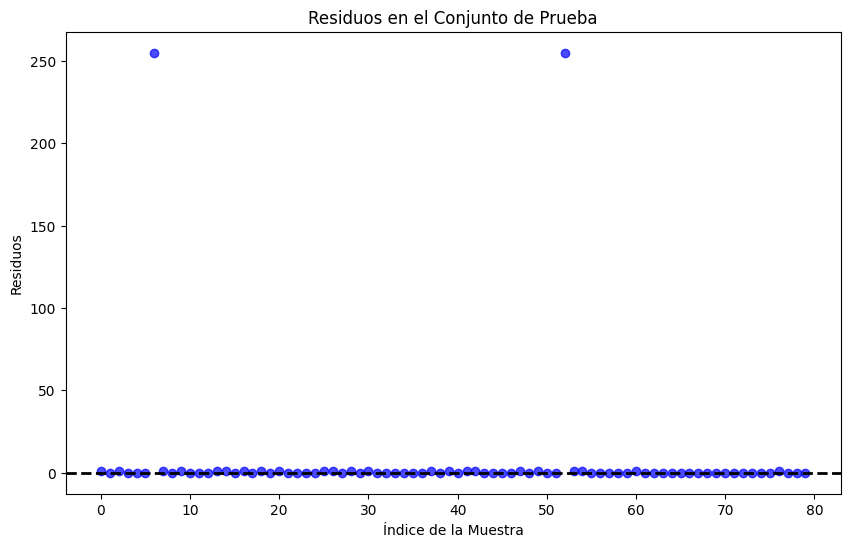

Precisión en el conjunto de entrenamiento: 0.7475
Precisión en el conjunto de validación: 0.6416666666666667
Precisión en el conjunto de prueba: 0.6875
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_model_refinado('dtc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2, num=41)

**Random Forest Classifier**


Mejor resultado:
Mejor valor de n: 16
Precisión en el conjunto de entrenamiento: 0.97375
Precisión en el conjunto de prueba: 0.7125
[[48  3]
 [23  6]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        51
           1       0.67      0.21      0.32        29

    accuracy                           0.68        80
   macro avg       0.67      0.57      0.55        80
weighted avg       0.67      0.68      0.62        80



Residuos:  [  1   0   1   0   0 255   0   1   0   0 255 255   0   1   0   0   0   0
   0   0   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0   0
   0   1   0   1   0   1   1   0   0   0   0   1   0   1   1   1   0   1
   1   0   0   0   1   1   1   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   0   1   0   0   0]


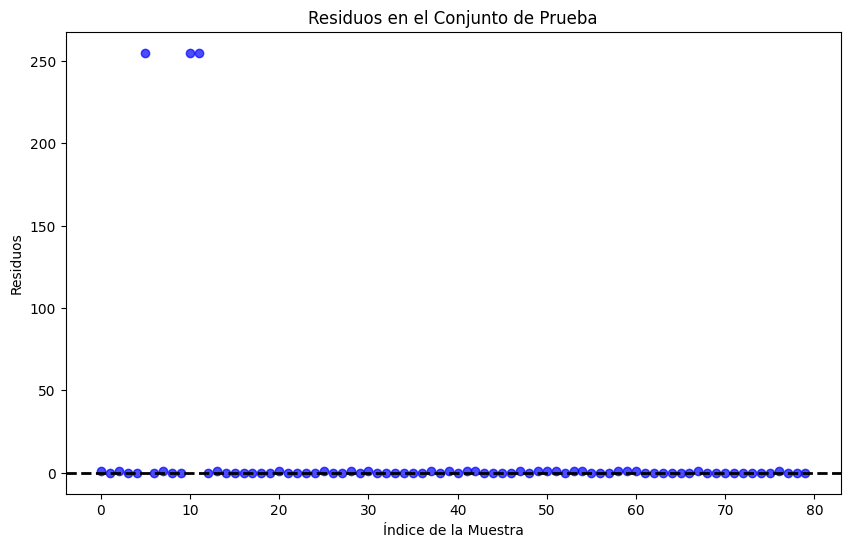

Precisión en el conjunto de entrenamiento: 0.97875
Precisión en el conjunto de validación: 0.7083333333333334
Precisión en el conjunto de prueba: 0.675
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_model_refinado('rfc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2, num=41)

**Victor Anderson Jamanca Vargas**

**Gradient Boosting Classifier**


Mejor resultado:
Mejor valor de n: 5
Precisión en el conjunto de entrenamiento: 0.86375
Precisión en el conjunto de prueba: 0.7
[[48  3]
 [24  5]]
              precision    recall  f1-score   support

           0       0.67      0.94      0.78        51
           1       0.62      0.17      0.27        29

    accuracy                           0.66        80
   macro avg       0.65      0.56      0.53        80
weighted avg       0.65      0.66      0.60        80



Residuos:  [  1   0   1   0   0   0   0   1   0   1   0   0   0   1   0   0   0   0
   0 255   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0 255
   0   1   0   1   0   1   1   0   0   0   0   1   0   1   1   1 255   1
   1   0   0   0   1   1   1   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   0   1   0   0   0]


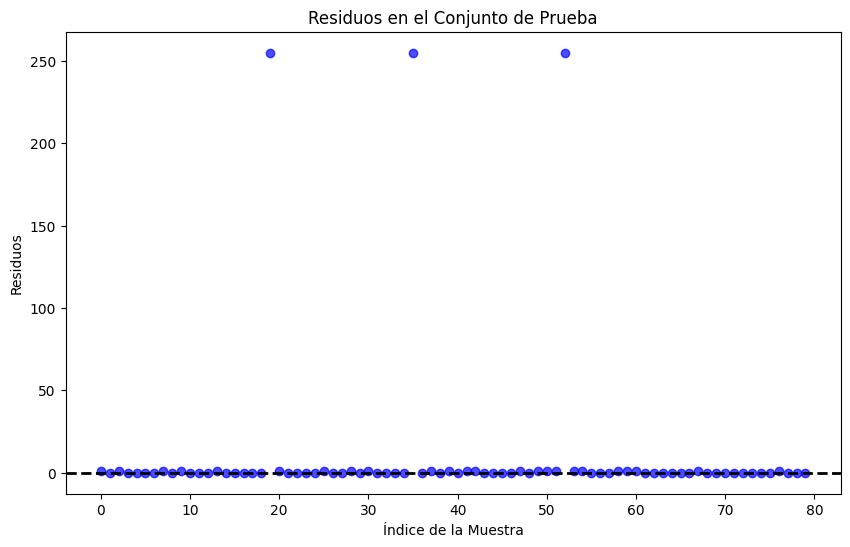

Precisión en el conjunto de entrenamiento: 0.8625
Precisión en el conjunto de validación: 0.7
Precisión en el conjunto de prueba: 0.6625
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_model_refinado('gbc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2, num=41)

**Stochastic Gradient Boosting**


Mejor resultado:
Mejor valor de n: 8
Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.7
[[49  2]
 [22  7]]
              precision    recall  f1-score   support

           0       0.69      0.96      0.80        51
           1       0.78      0.24      0.37        29

    accuracy                           0.70        80
   macro avg       0.73      0.60      0.59        80
weighted avg       0.72      0.70      0.65        80



Residuos:  [  1   0   1   0   0   0   0   1   0   0 255   0   0   1   0   0   0   0
   0 255   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0   0
   0   1   0   1   0   1   1   0   0   0   0   1   0   1   1   1   0   1
   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0]


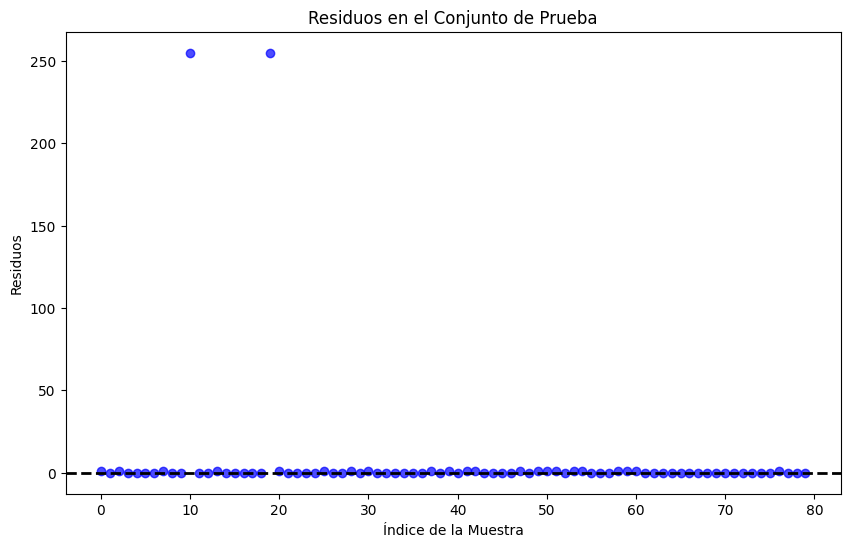

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de validación: 0.6833333333333333
Precisión en el conjunto de prueba: 0.7
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_model_refinado('sgd', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2, num=41)

XgBoost Classifier


Mejor resultado:
Mejor valor de n: 2
Precisión en el conjunto de entrenamiento: 0.77125
Precisión en el conjunto de prueba: 0.7
[[50  1]
 [23  6]]
              precision    recall  f1-score   support

           0       0.68      0.98      0.81        51
           1       0.86      0.21      0.33        29

    accuracy                           0.70        80
   macro avg       0.77      0.59      0.57        80
weighted avg       0.75      0.70      0.63        80



Residuos:  [ 1  0  1  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0
  0  1  0  0  1  0  1  0  0  0  0  0  0  1  0  1  0  1  1  0  0  0  0  1
  0  1  1  1 -1  1  1  0  0  0  1  1  1  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  1  0  0  0]


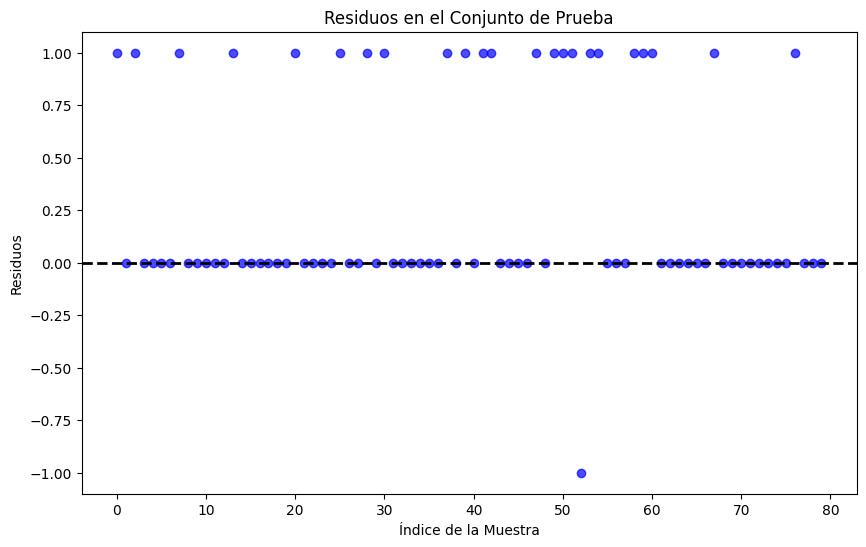

Precisión en el conjunto de entrenamiento: 0.77125
Precisión en el conjunto de validación: 0.725
Precisión en el conjunto de prueba: 0.7
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_model_refinado('xgb', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2, num=41)

**Cat Boost Classifier**

Learning rate set to 0.5
0:	learn: 0.5761430	test: 0.6158058	best: 0.6158058 (0)	total: 48.8ms	remaining: 0us

bestTest = 0.6158058183
bestIteration = 0

Learning rate set to 0.447738
0:	learn: 0.5839865	test: 0.6195436	best: 0.6195436 (0)	total: 1.71ms	remaining: 1.71ms
1:	learn: 0.5314271	test: 0.6022112	best: 0.6022112 (1)	total: 3.79ms	remaining: 0us

bestTest = 0.6022112432
bestIteration = 1

Learning rate set to 0.37534
0:	learn: 0.5964122	test: 0.6262641	best: 0.6262641 (0)	total: 1.59ms	remaining: 3.18ms
1:	learn: 0.5441573	test: 0.6055744	best: 0.6055744 (1)	total: 3.44ms	remaining: 1.72ms
2:	learn: 0.5206379	test: 0.6103399	best: 0.6055744 (1)	total: 5.21ms	remaining: 0us

bestTest = 0.605574421
bestIteration = 1

Shrink model to first 2 iterations.
Learning rate set to 0.331189
0:	learn: 0.6049168	test: 0.6312811	best: 0.6312811 (0)	total: 1.62ms	remaining: 4.85ms
1:	learn: 0.5536711	test: 0.6090679	best: 0.6090679 (1)	total: 3.2ms	remaining: 3.2ms
2:	learn: 0.5292596	test: 

Residuos:  [ 1  0  1  0  0  0  0  1 -1  1 -1  0  0  0  0  0  0  0  0 -1  1  0  0  0
  0  1  0  0  1  0  1  0  0  0  0  0  0  1  0  1  0  1  1  0  0  0  0  1
  0  1  1  1 -1  1  1  0  0  0  1  1  1 -1  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  1  0  0  0]


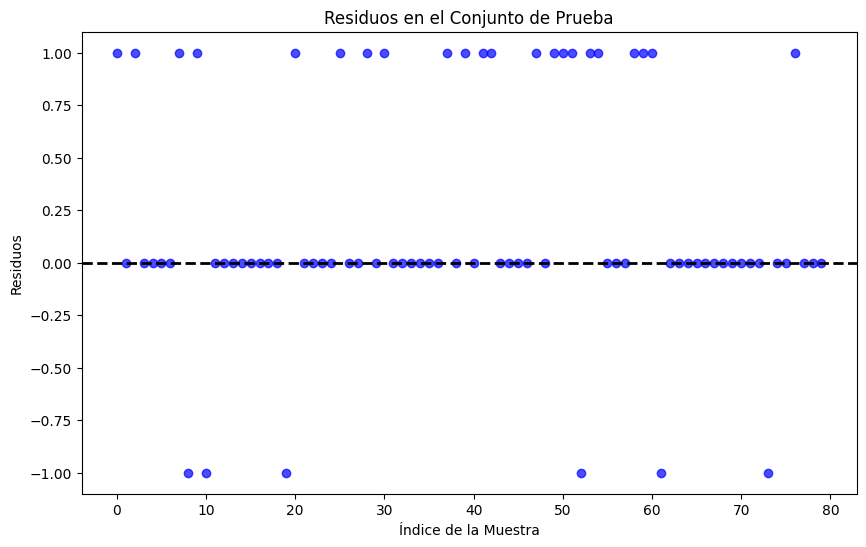

Precisión en el conjunto de entrenamiento: 0.85625
Precisión en el conjunto de validación: 0.675
Precisión en el conjunto de prueba: 0.65
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_model_refinado('cbc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2, num=41)

**Extra Trees Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

Comprobar CatBoost: 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.




Mejor resultado:
Mejor valor de n: 13
Precisión en el conjunto de entrenamiento: 0.9675
Precisión en el conjunto de prueba: 0.725
[[50  1]
 [21  8]]
              precision    recall  f1-score   support

           0       0.70      0.98      0.82        51
           1       0.89      0.28      0.42        29

    accuracy                           0.73        80
   macro avg       0.80      0.63      0.62        80
weighted avg       0.77      0.72      0.68        80



Residuos:  [  1   0   1   0   0   0   0   1   0   0 255   0   0   1   0   0   0   0
   0   0   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0   0
   0   1   0   1   0   1   1   0   0   0   0   1   0   0   1   1   0   1
   1   0   0   0   1   1   1   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   0   0   0   0   0]


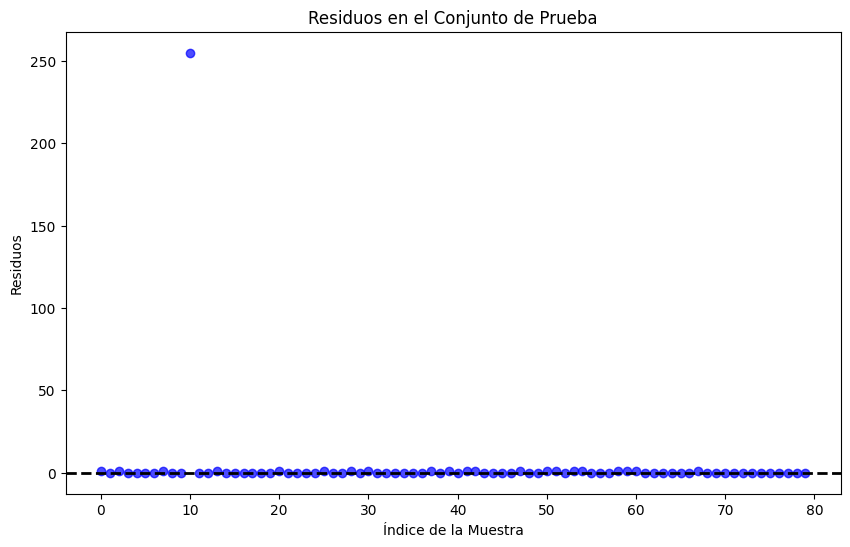

Precisión en el conjunto de entrenamiento: 0.9675
Precisión en el conjunto de validación: 0.6583333333333333
Precisión en el conjunto de prueba: 0.725
Posible problema de sobreajuste (overfitting)


In [ ]:
exec_model_refinado('etc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2, num=41)

**Victor Anderson Jamanca Vargas**

# **Metodo avanzado**

In [ ]:
def exec_model_avanzado(model, X_train_, y_train_, X_test_,y_test_,X_val_, y_val_):



  accuracy = []
  y_predd = []
  train_accs = []
  test_accs = []
  residuoss = []
  accuracy_ = []
  y_pred_bestt = []

  best_n = 0
  best_accuracy = 0
  best_params = ''
  params = []

  # Inicializar validación cruzada estratificada
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

  if(model == 'svc'):

    svc_model = SVC()

    param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

    svc_grid_search = GridSearchCV(svc_model, param_grid, cv=skf, scoring='accuracy', refit=True)

    # Ajustar el modelo a los datos de entrenamiento y validación
    svc_grid_search.fit(X_train_, y_train_)
    #Victor Anderson Jamanca Vargas
    # Obtener los mejores hiperparámetros
    best_params = svc_grid_search.best_params_

    # Obtener el mejor modelo
    svc_best_model = svc_grid_search.best_estimator_

    y_pred_best = svc_best_model.predict(X_test_)

    svc_model_train_acc = accuracy_score(y_train_, svc_best_model.predict(X_train_))
    svc_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(svc_model_train_acc)
    accuracy.append(svc_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = svc_best_model.predict(X_train_)
    Y_val_pred = svc_best_model.predict(X_val_)
    Y_test_pred = svc_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'knn'):

    knn_model = KNeighborsClassifier(metric='euclidean')

    # Definir el espacio de búsqueda de hiperparámetros
    param_grid = param_grid = {'n_neighbors': [9, 39, 79, 109, 139], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

    knn_grid_search = GridSearchCV(knn_model, param_grid, cv=skf, n_jobs = -1, verbose = 1)

    # Ajustar el modelo a los datos de entrenamiento y validación
    knn_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = knn_grid_search.best_params_

    # Obtener el mejor modelo
    knn_best_model = knn_grid_search.best_estimator_

    y_pred_best = knn_best_model.predict(X_test_)

    knn_model_train_acc = accuracy_score(y_train_, knn_best_model.predict(X_train_))
    knn_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(knn_model_train_acc)
    accuracy.append(knn_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = knn_best_model.predict(X_train_)
    Y_val_pred = knn_best_model.predict(X_val_)
    Y_test_pred = knn_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

    # Create subplots for accuracy during iterations
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Train Accuracy', 'Test Accuracy'))

    accuracy_train_iter = []
    accuracy_test_iter = []

    for i, params in enumerate(knn_grid_search.cv_results_['params']):
        knn_model.set_params(**params)
        knn_model.fit(X_train_, y_train_)

        Y_train_pred = knn_model.predict(X_train_)
        Y_test_pred = knn_model.predict(X_test_)

        accuracy_train = accuracy_score(y_train_, Y_train_pred)
        accuracy_test = accuracy_score(y_test_, Y_test_pred)

        accuracy_train_iter.append(accuracy_train)
        accuracy_test_iter.append(accuracy_test)

        # Update subplots
        trace_train = go.Scatter(x=np.arange(1, i+2), y=accuracy_train_iter, mode='lines+markers', name=f'{params}')
        trace_test = go.Scatter(x=np.arange(1, i+2), y=accuracy_test_iter, mode='lines+markers', name=f'{params}')

        fig.add_trace(trace_train, row=1, col=1)
        fig.add_trace(trace_test, row=1, col=2)

    fig.update_layout(title_text='Accuracy during Iterations', showlegend=True)
    py.iplot(fig)

  elif(model == 'dtc'):

    grid_params = {
    'criterion': ['gini','entropy'],
    'max_depth': [30, 60, 90, 120, 150, 200, 250],
    'min_samples_split' : range(2,10,1),
    'min_samples_leaf': range(2, 10, 1)
    }

    decision_tree_model = DecisionTreeClassifier()

    dtc_grid_search = GridSearchCV(decision_tree_model, grid_params, cv=skf, n_jobs = -1, verbose = 1)
    dtc_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = dtc_grid_search.best_params_

    decision_tree_best_model = dtc_grid_search.best_estimator_
    y_pred_best = decision_tree_best_model.predict(X_test_)

    decision_tree_model_train_acc = accuracy_score(y_train_, decision_tree_best_model.predict(X_train_))
    decision_tree_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(decision_tree_model_train_acc)
    accuracy.append(decision_tree_model_test_acc)

    train_accs.append(decision_tree_model_train_acc)
    test_accs.append(decision_tree_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = decision_tree_best_model.predict(X_train_)
    Y_val_pred = decision_tree_best_model.predict(X_val_)
    Y_test_pred = decision_tree_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

    # # Create subplots for accuracy during iterations
    # fig = make_subplots(rows=1, cols=2, subplot_titles=('Train Accuracy', 'Test Accuracy'))

    # accuracy_train_iter = []
    # accuracy_test_iter = []

    # for i, params in enumerate(dtc_grid_search.cv_results_['params']):
    #     decision_tree_model.set_params(**params)
    #     decision_tree_model.fit(X_train_, y_train_)

    #     Y_train_pred = decision_tree_model.predict(X_train_)
    #     Y_test_pred = decision_tree_model.predict(X_test_)

    #     accuracy_train = accuracy_score(y_train_, Y_train_pred)
    #     accuracy_test = accuracy_score(y_test_, Y_test_pred)

    #     accuracy_train_iter.append(accuracy_train)
    #     accuracy_test_iter.append(accuracy_test)

    #     # Update subplots
    #     trace_train = go.Scatter(x=np.arange(1, i+2), y=accuracy_train_iter, mode='lines+markers', name=f'{params}')
    #     trace_test = go.Scatter(x=np.arange(1, i+2), y=accuracy_test_iter, mode='lines+markers', name=f'{params}')

    #     fig.add_trace(trace_train, row=1, col=1)
    #     fig.add_trace(trace_test, row=1, col=2)

    # fig.update_layout(title_text='Accuracy during Iterations', showlegend=True)
    # py.iplot(fig)


  elif(model == 'rfc'):

    grid_params = {
        'criterion': ['gini','entropy'],
        'n_estimators':[50, 100, 200],
        'max_depth': [30, 60, 90, 120, 150],
        'min_samples_split':[2, 5, 10],
        #'max_features':[sqrt],
        'min_samples_leaf':[1, 2, 4]
    }

    rfc_model = RandomForestClassifier()

    rfc_grid_search = GridSearchCV(estimator=rfc_model, param_grid=grid_params, cv=skf, scoring='accuracy')
    rfc_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = rfc_grid_search.best_params_

    rfc_best_model = rfc_grid_search.best_estimator_
    y_pred_best = rfc_best_model.predict(X_test_)

    rfc_model_train_acc = accuracy_score(y_train_, rfc_best_model.predict(X_train_))
    rfc_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(rfc_model_train_acc)
    accuracy.append(rfc_model_test_acc)

    train_accs.append(rfc_model_train_acc)
    test_accs.append(rfc_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = rfc_best_model.predict(X_train_)
    Y_val_pred = rfc_best_model.predict(X_val_)
    Y_test_pred = rfc_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'gbc'):

    grid_params = {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [30, 60, 90],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0]
    }

    gbc_model = GradientBoostingClassifier()

    gbc_grid_search = GridSearchCV(estimator=gbc_model, param_grid=grid_params, cv=skf, scoring='accuracy')
    gbc_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = gbc_grid_search.best_params_

    gbc_best_model = gbc_grid_search.best_estimator_
    y_pred_best = gbc_best_model.predict(X_test_)

    gbc_model_train_acc = accuracy_score(y_train_, gbc_best_model.predict(X_train_))
    gbc_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(gbc_model_train_acc)
    accuracy.append(gbc_model_test_acc)

    train_accs.append(gbc_model_train_acc)
    test_accs.append(gbc_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = gbc_best_model.predict(X_train_)
    Y_val_pred = gbc_best_model.predict(X_val_)
    Y_test_pred = gbc_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)


  elif(model == 'sgb'):

    grid_params = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [30, 60, 90, 120],
        'subsample': [0.8, 0.9, 1.0],
    }

    hgbc_model = GradientBoostingClassifier()

    hgbc_grid_search = GridSearchCV(estimator=hgbc_model, param_grid=grid_params, cv=skf, scoring='accuracy')
    hgbc_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = hgbc_grid_search.best_params_

    hgbc_best_model = hgbc_grid_search.best_estimator_
    y_pred_best = hgbc_best_model.predict(X_test_)

    hgbc_model_train_acc = accuracy_score(y_train_, hgbc_best_model.predict(X_train_))
    hgbc_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(hgbc_model_train_acc)
    accuracy.append(hgbc_model_test_acc)

    train_accs.append(hgbc_model_train_acc)
    test_accs.append(hgbc_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = hgbc_best_model.predict(X_train_)
    Y_val_pred = hgbc_best_model.predict(X_val_)
    Y_test_pred = hgbc_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'xgb'):

    # Inicializar y ajustar el LabelEncoder en el conjunto de entrenamiento
    le = LabelEncoder()
    y_train_ = le.fit_transform(y_train_)

    # Utilizar el mismo LabelEncoder para transformar el conjunto de prueba
    y_test_ = le.transform(y_test_)

    grid_params = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [30, 60, 90, 120],
        'subsample': [0.8, 0.9, 1.0],
    }

    xgb_model = XGBClassifier()

    xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=grid_params, cv=skf, scoring='accuracy')
    xgb_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = xgb_grid_search.best_params_

    xgb_best_model = xgb_grid_search.best_estimator_
    y_pred_best = xgb_best_model.predict(X_test_)

    xgb_model_train_acc = accuracy_score(y_train_, xgb_best_model.predict(X_train_))
    xgb_model_test_acc = accuracy_score(y_test_, y_pred_best)
    #Victor Anderson Jamanca Vargas
    accuracy.append(xgb_model_train_acc)
    accuracy.append(xgb_model_test_acc)

    train_accs.append(xgb_model_train_acc)
    test_accs.append(xgb_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = xgb_best_model.predict(X_train_)
    Y_val_pred = xgb_best_model.predict(X_val_)
    Y_test_pred = xgb_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)


  elif(model == 'cbc'):

    grid_params = {
      'learning_rate': [0.01, 0.1, 0.5],  # Exploración logarítmica
      'max_depth': [10, 20],  # Limitar el rango
      'iterations': [10, 20, 30],
      'l2_leaf_reg': [1, 3, 5],
      #'border_count': [10, 20, 40],
      #'random_strength': [0.1, 0.5, 1],
      #'bagging_temperature': [0.1, 0.5, 1],
      'od_type': ['IncToDec', 'Iter'],
      'od_wait': [20, 30, 50]
    }

    cbc_model = CatBoostClassifier()

    cbc_grid_search = GridSearchCV(estimator=cbc_model, param_grid=grid_params, cv=skf, scoring='accuracy')
    cbc_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = cbc_grid_search.best_params_

    cbc_best_model = cbc_grid_search.best_estimator_
    y_pred_best = cbc_best_model.predict(X_test_)

    cbc_model_train_acc = accuracy_score(y_train_, cbc_best_model.predict(X_train_))
    cbc_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(cbc_model_train_acc)
    accuracy.append(cbc_model_test_acc)

    train_accs.append(cbc_model_train_acc)
    test_accs.append(cbc_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = cbc_best_model.predict(X_train_)
    Y_val_pred = cbc_best_model.predict(X_val_)
    Y_test_pred = cbc_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'etc'):

    grid_params = {
      'n_estimators': [20, 60],
      'criterion': ['gini', 'entropy'],
      'max_depth': [None, 60, 90],
      'min_samples_split': [2, 5],
      'min_samples_leaf': [1, 2],
      'max_features': ['auto', 'sqrt', 'log2'],
      'bootstrap': [True, False]
    }

    etc_model = ExtraTreesClassifier()

    etc_grid_search = GridSearchCV(estimator=etc_model, param_grid=grid_params, cv=skf, scoring='accuracy')
    etc_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = etc_grid_search.best_params_

    etc_best_model = etc_grid_search.best_estimator_
    y_pred_best = etc_best_model.predict(X_test_)

    etc_model_train_acc = accuracy_score(y_train_, etc_best_model.predict(X_train_))
    etc_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(etc_model_train_acc)
    accuracy.append(etc_model_test_acc)

    train_accs.append(etc_model_train_acc)
    test_accs.append(etc_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = etc_best_model.predict(X_train_)
    Y_val_pred = etc_best_model.predict(X_val_)
    Y_test_pred = etc_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  elif(model == 'abc'):

    parameters = {
      'n_estimators': [50, 70, 90, 120],
      'learning_rate': [0.001, 0.01, 0.1, 1],
      'algorithm': ['SAMME', 'SAMME.R']
    }

    abc_model = AdaBoostClassifier()

    abc_grid_search = GridSearchCV(estimator=abc_model, param_grid=parameters, cv=skf, scoring='accuracy')
    abc_grid_search.fit(X_train_, y_train_)

    # Obtener los mejores hiperparámetros
    best_params = abc_grid_search.best_params_

    abc_best_model = abc_grid_search.best_estimator_
    y_pred_best = abc_best_model.predict(X_test_)

    abc_model_train_acc = accuracy_score(y_train_, abc_best_model.predict(X_train_))
    abc_model_test_acc = accuracy_score(y_test_, y_pred_best)

    accuracy.append(abc_model_train_acc)
    accuracy.append(abc_model_test_acc)

    train_accs.append(abc_model_train_acc)
    test_accs.append(abc_model_test_acc)

    #Comprobar residuo
    y_pred_bestt.append(y_pred_best)

    residuos = y_test_ - y_pred_best
    residuoss.append(residuos)

    # Realizar predicciones en el conjunto de entrenamiento, validación y prueba
    Y_train_pred = abc_best_model.predict(X_train_)
    Y_val_pred = abc_best_model.predict(X_val_)
    Y_test_pred = abc_best_model.predict(X_test_)

    # Calcular la precisión en el conjunto de entrenamiento, validación y prueba
    accuracy_train = accuracy_score(y_train_, Y_train_pred)
    accuracy_val = accuracy_score(y_val_, Y_val_pred)
    accuracy_test = accuracy_score(y_test_, Y_test_pred)

    accuracy_.append(accuracy_train)
    accuracy_.append(accuracy_val)
    accuracy_.append(accuracy_test)

  else:
    # model ...
    pass

  #if(num==1):
  #
  # print("Training Accuracy: ", accuracy[0])
  #  print("Testing Accuracy: ", accuracy[1])
  #  print("Validation Accuracy: ", accuracy[2])
  #
  #  print(confusion_matrix(y_test_, y_predd[0]))
  #  print(classification_report(y_test_, y_predd[0]))

  #if(num!=1):


  #print("Precisión en el conjunto de entrenamiento:", train_accs[best_n_index])
  #print("Precisión en el conjunto de prueba:", test_accs[best_n_index])

  print(confusion_matrix(y_test_, y_pred_bestt[0]))
  print(classification_report(y_test_, y_pred_bestt[0]))

  # # Crear subplots
  # fig = make_subplots(rows=2, cols=1, subplot_titles=["Training Accuracy", "Testing Accuracy"])

  # # Añadir trazas al primer subplot (Training Accuracy)
  # fig.add_trace(go.Scatter(x=params, y=train_accs, mode='lines+markers', name='Training Accuracy'), row=1, col=1)

  # # Añadir trazas al segundo subplot (Testing Accuracy)
  # fig.add_trace(go.Scatter(x=params, y=test_accs, mode='lines+markers', name='Testing Accuracy'), row=2, col=1)

  # # Actualizar el diseño del gráfico
  # fig.update_layout(title_text='Accuracy vs Numbers (n)', xaxis_title='Numbers (n)', yaxis_title='Accuracy')

  # # Mostrar el gráfico
  # py.iplot(fig)

  #Comprobar residuso
  print("Residuos: ", residuoss[0])

  # Graficar los residuos
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(residuoss[0])), residuoss[0], color='blue', alpha=0.7)
  plt.axhline(0, color='black', linestyle='--', linewidth=2)
  plt.title('Residuos en el Conjunto de Prueba')
  plt.xlabel('Índice de la Muestra')
  plt.ylabel('Residuos')
  plt.show()

  print("\nMejor resultado:")
  print("Mejores hiperparametros:", best_params)
  print(f"Precisión en el conjunto de entrenamiento: {accuracy_[0]}")
  print(f"Precisión en el conjunto de validación: {accuracy_[1]}")
  print(f"Precisión en el conjunto de prueba: {accuracy_[2]}")

  # Analizar la precisión para detectar desviación, sobreajuste o generalización adecuada
  if accuracy_[0] < accuracy_[1]:
      print("Posible problema de desviación (underfitting)")
  elif accuracy_[0] > accuracy_[2]:
      print("Posible problema de sobreajuste (overfitting)")
  else:
      print("El modelo parece estar generalizando de manera adecuada")

  return accuracy_[2]

**GridSearch**

SVC

In [ ]:
svc_score_pca = exec_model_avanzado('svc', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2, num=None)
svc_score_pca

TypeError: exec_model_avanzado() got an unexpected keyword argument 'num'

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [ ]:
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# instantiate the logistic regression model
logreg = LogisticRegression()

# instantiate the grid search model
lr_grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=skf, n_jobs=-1)

# fit the grid search to the data
lr_grid_search.fit(X_train_2, y_train_2)

# print the best parameters
print("Best Parameters: ", lr_grid_search.best_params_)

Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
selected_columns = ['Risk_good', 'Risk_bad', 'Checking account_Unknown', 'Checking account_little', 'credit_per_duration', 'Saving accounts_little']

# Create a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()
X = new_df.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = new_df['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.6625
              precision    recall  f1-score   support

           0       0.67      0.94      0.78        51
           1       0.62      0.17      0.27        29

    accuracy                           0.66        80
   macro avg       0.65      0.56      0.53        80
weighted avg       0.65      0.66      0.60        80



[[51  0]
 [24  5]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        51
           1       1.00      0.17      0.29        29

    accuracy                           0.70        80
   macro avg       0.84      0.59      0.55        80
weighted avg       0.80      0.70      0.62        80

Residuos:  [1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0]


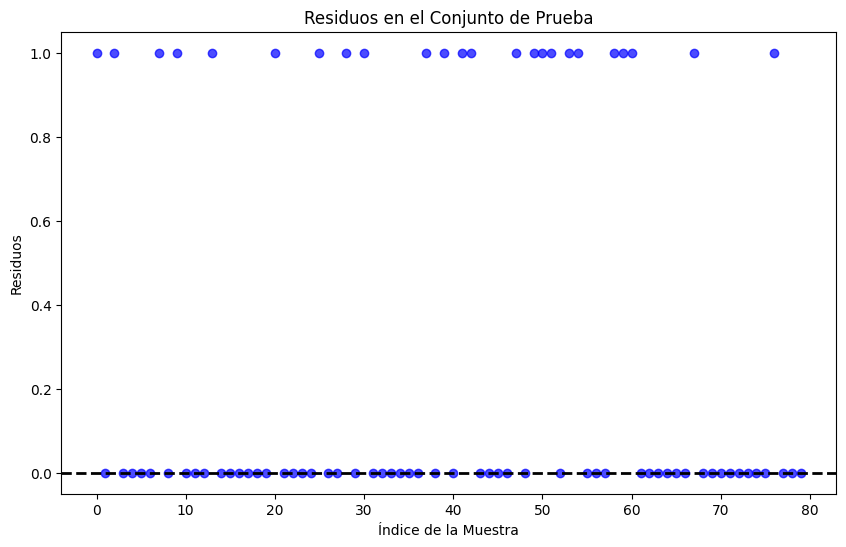


Mejor resultado:
Mejores hiperparametros: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Precisión en el conjunto de entrenamiento: 0.755
Precisión en el conjunto de validación: 0.7
Precisión en el conjunto de prueba: 0.7
Posible problema de sobreajuste (overfitting)


0.7

In [ ]:
svc_score = exec_model_avanzado('svc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)
svc_score

KNN

In [ ]:
knn_score_pca = exec_model_avanzado('knn', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2, num=41)
knn_score_pca

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[[ 0 29]
 [ 0 51]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.64      1.00      0.78        51

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

Residuos:  [-1  0 -1  0  0  0  0 -1  0 -1  0  0  0 -1 -1  0 -1  0 -1  0 -1  0  0  0
  0 -1 -1  0 -1  0 -1  0  0  0  0  0  0 -1  0 -1  0 -1 -1  0  0  0 -1 -1
  0 -1 -1 -1  0 -1 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0 -1  0  0  0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



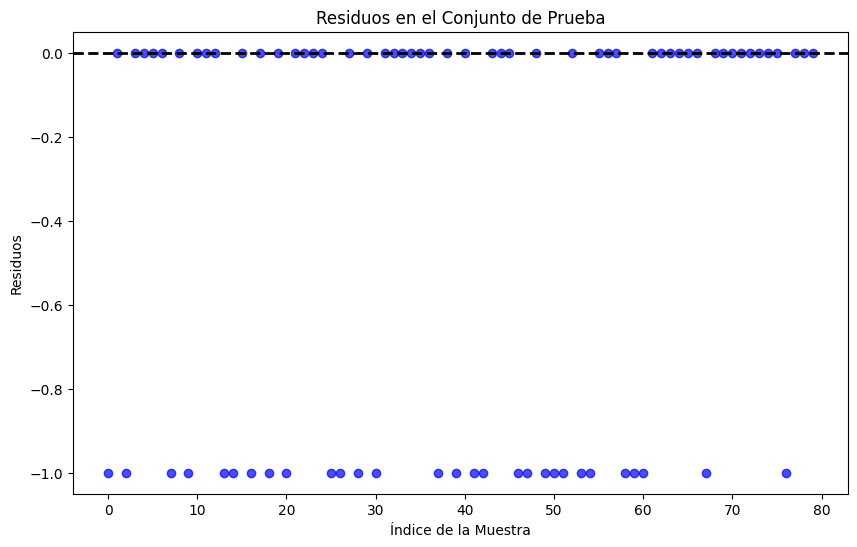


Mejor resultado:
Mejores hiperparametros: {'n_neighbors': 79, 'p': 1, 'weights': 'uniform'}
Precisión en el conjunto de entrenamiento: 0.7125
Precisión en el conjunto de validación: 0.6916666666666667
Precisión en el conjunto de prueba: 0.6375
Posible problema de sobreajuste (overfitting)


In [ ]:
knn_score = exec_model_avanzado('knn', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

Decision Tree Model

In [ ]:
dtc_score_pca = exec_model_avanzado('dtc', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2)
dtc_score_pca

Fitting 5 folds for each of 896 candidates, totalling 4480 fits
[[11 18]
 [13 38]]
              precision    recall  f1-score   support

           0       0.46      0.38      0.42        29
           1       0.68      0.75      0.71        51

    accuracy                           0.61        80
   macro avg       0.57      0.56      0.56        80
weighted avg       0.60      0.61      0.60        80

Residuos:  [ 0  0 -1  0  0  1  1 -1  1  0  1  1  0 -1 -1  0  0  0 -1  0 -1  0  0  0
  0 -1  0  1 -1  0  0  0  0  0  0  0  1 -1  1 -1  0  0 -1  0  1  0  0 -1
  0 -1  0 -1  1  0 -1  0  1  0  0  0 -1  1  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0 -1  0  1  0]


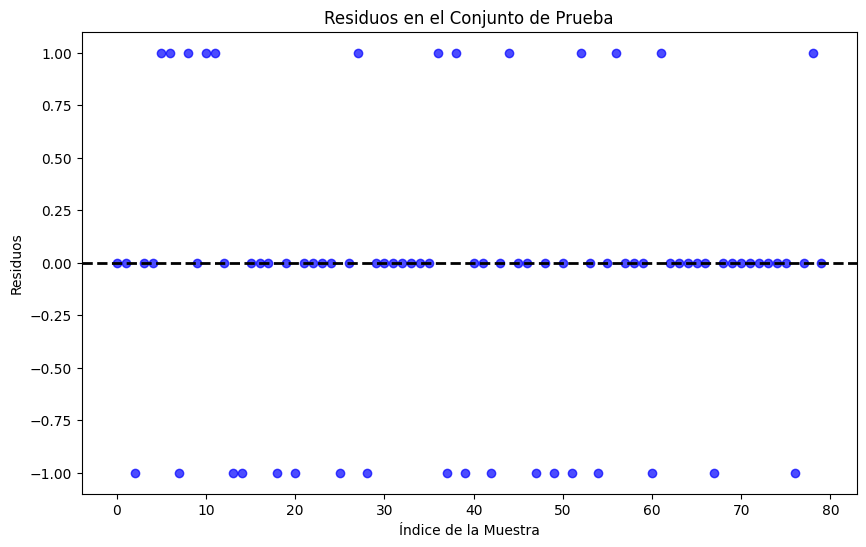


Mejor resultado:
Mejores hiperparametros: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 8, 'min_samples_split': 7}
Precisión en el conjunto de entrenamiento: 0.80625
Precisión en el conjunto de validación: 0.575
Precisión en el conjunto de prueba: 0.6125
Posible problema de sobreajuste (overfitting)


In [ ]:
dtc_score = exec_model_avanzado('dtc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

Random Forest Model

In [ ]:
rf_score_pca = exec_model_avanzado('rfc', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2)
rf_score_pca

In [ ]:
rf_score = exec_model_avanzado('rfc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

KeyboardInterrupt: 

Gradient Boosting Classifier

In [ ]:
gbc_score_pca = exec_model_avanzado('gbc', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2)
gbc_score_pca

[[51  0]
 [25  4]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        51
           1       1.00      0.14      0.24        29

    accuracy                           0.69        80
   macro avg       0.84      0.57      0.52        80
weighted avg       0.79      0.69      0.60        80

Residuos:  [1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0]


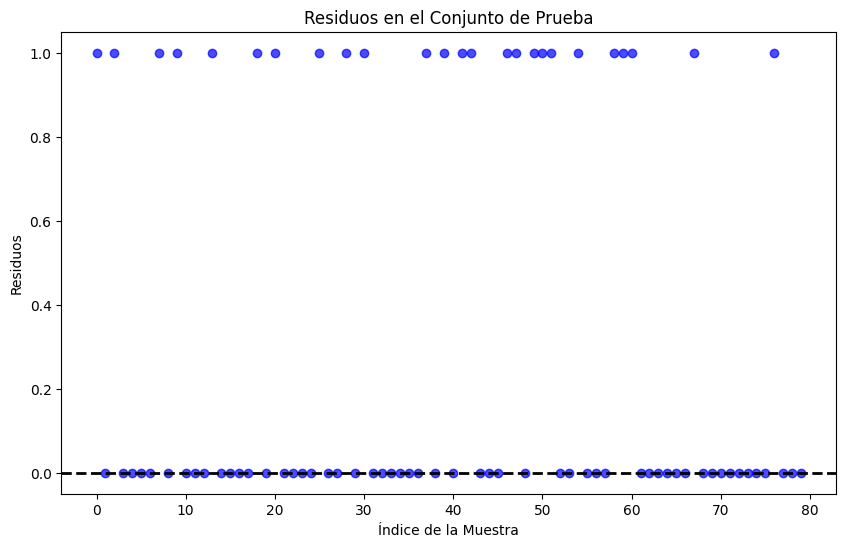


Mejor resultado:
Mejores hiperparametros: {'learning_rate': 0.01, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de validación: 0.65
Precisión en el conjunto de prueba: 0.6875
Posible problema de sobreajuste (overfitting)


In [ ]:
gbc_score = exec_model_avanzado('gbc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

Stochastic Gradient Boosting

In [ ]:
sgc_score_pca = exec_model_avanzado('sgb', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2, num=21)
sgc_score_pca

[[51  0]
 [29  0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        51
           1       0.00      0.00      0.00        29

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

Residuos:  [1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



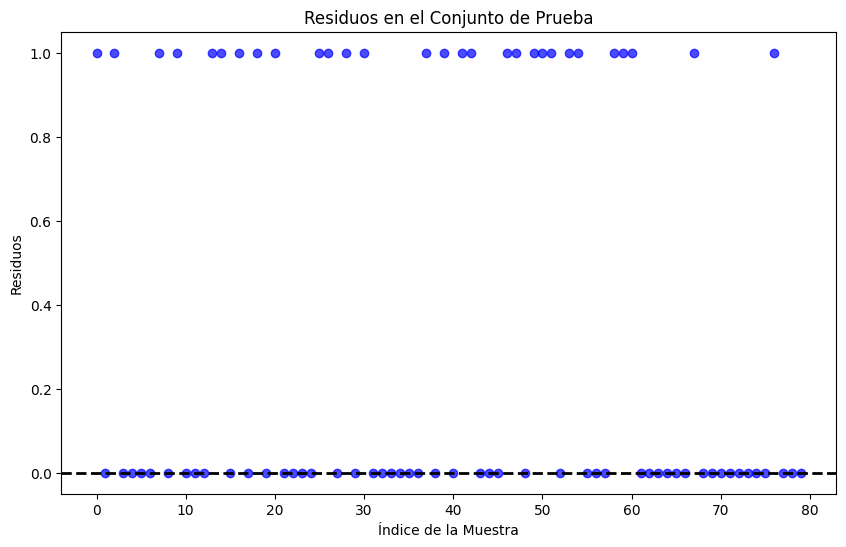


Mejor resultado:
Mejores hiperparametros: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 50, 'subsample': 0.8}
Precisión en el conjunto de entrenamiento: 0.9725
Precisión en el conjunto de validación: 0.7
Precisión en el conjunto de prueba: 0.6375
Posible problema de sobreajuste (overfitting)


In [ ]:
sgb_score = exec_model_avanzado('sgb', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

XgBoost Classifier

In [ ]:
xgb_score_pca = exec_model_avanzado('xgb', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2, num=41)
xgb_score_pca

[[46  5]
 [20  9]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        51
           1       0.64      0.31      0.42        29

    accuracy                           0.69        80
   macro avg       0.67      0.61      0.60        80
weighted avg       0.68      0.69      0.65        80

Residuos:  [ 1  0  1  0  0 -1  0  1  0  0 -1 -1  0  1  0  0  0  0  0  0  1  0  0  0
  0  1  0  0  1  0  1 -1  0  0  0 -1  0  1  0  1  0  1  1  0  0  0  0  1
  0  1  1  1  0  0  1  0  0  0  1  1  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0]


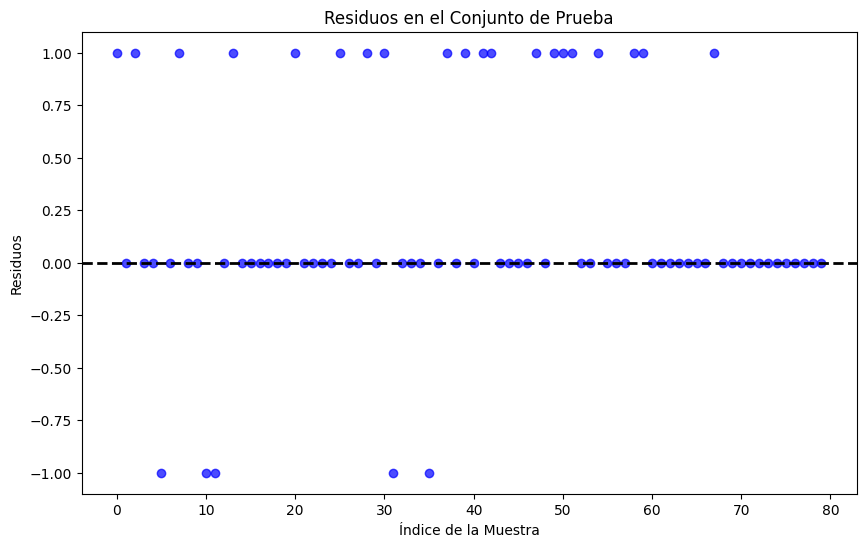


Mejor resultado:
Mejores hiperparametros: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 50, 'subsample': 1.0}
Precisión en el conjunto de entrenamiento: 0.9925
Precisión en el conjunto de validación: 0.6666666666666666
Precisión en el conjunto de prueba: 0.6875
Posible problema de sobreajuste (overfitting)


In [ ]:
xgb_score = exec_model_avanzado('xgb', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

**Victor Anderson Jamanca Vargas**

Cat Boost Classifier

In [ ]:
cbc_score_pca = exec_model_avanzado('cbc', X_train_pca, y_train_2, X_test_pca,y_test_2,X_val_pca, y_val_2, num=21)
cbc_score_pca

Se han truncado las últimas 5000 líneas del flujo de salida.
10:	learn: 0.6509876	total: 126ms	remaining: 217ms
11:	learn: 0.6478014	total: 138ms	remaining: 207ms
12:	learn: 0.6438879	total: 150ms	remaining: 196ms
13:	learn: 0.6406168	total: 156ms	remaining: 179ms
14:	learn: 0.6378292	total: 170ms	remaining: 170ms
15:	learn: 0.6339118	total: 183ms	remaining: 160ms
16:	learn: 0.6299137	total: 196ms	remaining: 150ms
17:	learn: 0.6268428	total: 208ms	remaining: 139ms
18:	learn: 0.6252114	total: 210ms	remaining: 121ms
19:	learn: 0.6225538	total: 222ms	remaining: 111ms
20:	learn: 0.6197607	total: 235ms	remaining: 101ms
21:	learn: 0.6165501	total: 247ms	remaining: 89.9ms
22:	learn: 0.6136326	total: 259ms	remaining: 78.8ms
23:	learn: 0.6098264	total: 271ms	remaining: 67.8ms
24:	learn: 0.6066966	total: 294ms	remaining: 58.8ms
25:	learn: 0.6043820	total: 306ms	remaining: 47.1ms
26:	learn: 0.6010592	total: 318ms	remaining: 35.3ms
27:	learn: 0.5990870	total: 325ms	remaining: 23.2ms
28:	learn: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5100, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2303, in _fit


0:	learn: 0.6485649	total: 11.9ms	remaining: 107ms
1:	learn: 0.6186690	total: 27.1ms	remaining: 108ms
2:	learn: 0.5888944	total: 43.3ms	remaining: 101ms
3:	learn: 0.5657792	total: 54.8ms	remaining: 82.2ms
4:	learn: 0.5382385	total: 66.8ms	remaining: 66.8ms
5:	learn: 0.5171479	total: 78.4ms	remaining: 52.3ms
6:	learn: 0.5068681	total: 80.7ms	remaining: 34.6ms
7:	learn: 0.4861057	total: 92.7ms	remaining: 23.2ms
8:	learn: 0.4722039	total: 105ms	remaining: 11.6ms
9:	learn: 0.4616510	total: 117ms	remaining: 0us
[[50  1]
 [23  6]]
              precision    recall  f1-score   support

           0       0.68      0.98      0.81        51
           1       0.86      0.21      0.33        29

    accuracy                           0.70        80
   macro avg       0.77      0.59      0.57        80
weighted avg       0.75      0.70      0.63        80

Residuos:  [ 1  0  1  0  0  0  0  1  0  1  0  0  0  1  0  0  0  0  0  0  1  0  0  0
  0  1  0  0  1  0  1  0  0  0  0  0  0  1  0  1  0  1  1 

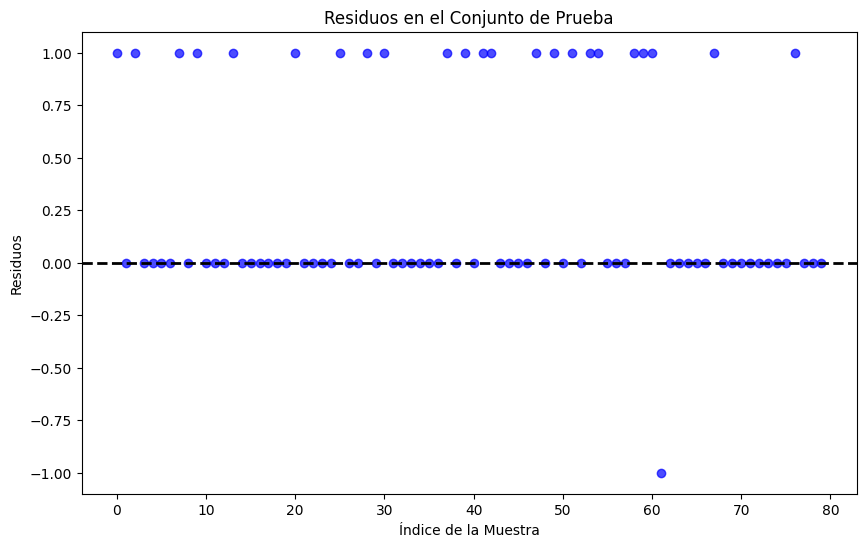


Mejor resultado:
Mejores hiperparametros: {'iterations': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 10, 'od_type': 'IncToDec', 'od_wait': 20}
Precisión en el conjunto de entrenamiento: 0.82625
Precisión en el conjunto de validación: 0.6916666666666667
Precisión en el conjunto de prueba: 0.7
Posible problema de sobreajuste (overfitting)


In [ ]:
cbc_score = exec_model_avanzado('cbc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

Extra Trees Classifier



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

[[50  1]
 [23  6]]
              precision    recall  f1-score   support

           0       0.68      0.98      0.81        51
           1       0.86      0.21      0.33        29

    accuracy                           0.70        80
   macro avg       0.77      0.59      0.57        80
weighted avg       0.75      0.70      0.63        80

Residuos:  [  1   0   1   0   0   0   0   1   0   1 255   0   0   1   0   0   0   0
   0   0   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0   0
   0   1   0   1   0   1   1   0   0   0   0   1   0   1   1   1   0   1
   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0]


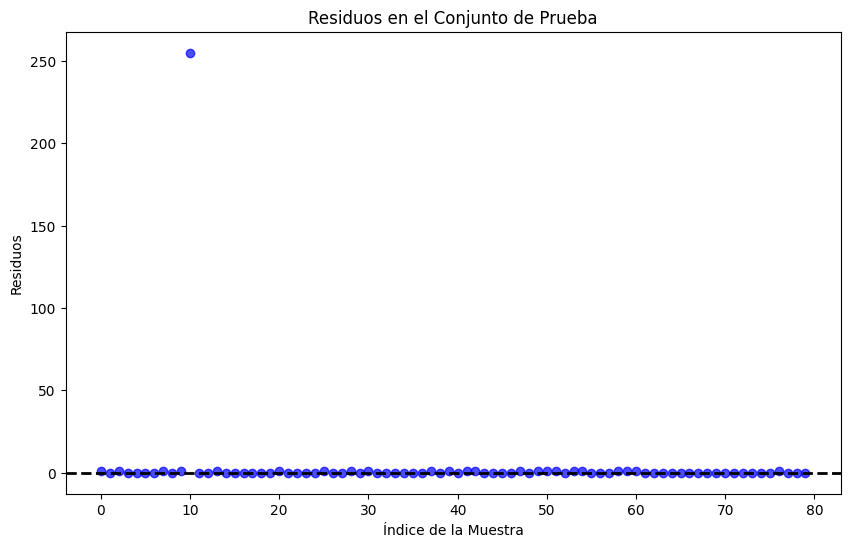


Mejor resultado:
Mejores hiperparametros: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 90, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}
Precisión en el conjunto de entrenamiento: 0.83125
Precisión en el conjunto de validación: 0.7
Precisión en el conjunto de prueba: 0.7
Posible problema de sobreajuste (overfitting)


In [ ]:
etc_score = exec_model_avanzado('etc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

**Ada Bosst Classifier**

[[49  2]
 [24  5]]
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        51
           1       0.71      0.17      0.28        29

    accuracy                           0.68        80
   macro avg       0.69      0.57      0.53        80
weighted avg       0.69      0.68      0.60        80

Residuos:  [  1   0   1   0   0   0   0   1   0   1 255   0   0   1   0   0   0   0
   0   0   1   0   0   0   0   1   0   0   1   0   1   0   0   0   0   0
   0   1   0   1   0   1   1   0   0   0   0   1   0   1   1   1 255   1
   1   0   0   0   1   1   1   0   0   0   0   0   0   1   0   0   0   0
   0   0   0   0   1   0   0   0]


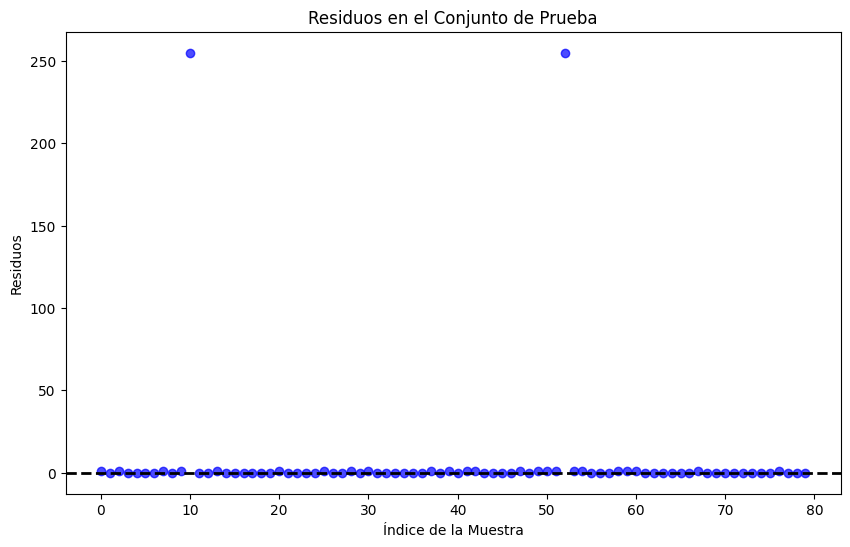


Mejor resultado:
Mejores hiperparametros: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 70}
Precisión en el conjunto de entrenamiento: 0.73875
Precisión en el conjunto de validación: 0.7166666666666667
Precisión en el conjunto de prueba: 0.675
Posible problema de sobreajuste (overfitting)


In [ ]:
abc_score = exec_model_avanzado('abc', X_train_2, y_train_2, X_test_2,y_test_2,X_val_2, y_val_2)

Voting Classifier

In [ ]:
svc_model = SVC()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr_classifier = LogisticRegression()
ada_model = AdaBoostClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
etc = ExtraTreesClassifier()
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)

In [ ]:
classifiers = [('Support Vector Classifier', svc_model), ('knn_model', knn_model), ('Decision Tree', decision_tree_model), ('Random Forest', rf_model),('Ada Boost',ada_model),('XGboost', xgb),('Gradient Boosting Classifier', gb),
              ('SGB', sgb), ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('lr classifier', lr_classifier)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train_2, y_train_2)

y_pred_2 = vc.predict(X_test_2)

Learning rate set to 0.009366
0:	learn: 0.6900288	total: 1.84ms	remaining: 1.84s
1:	learn: 0.6869324	total: 3.74ms	remaining: 1.87s
2:	learn: 0.6842451	total: 5.49ms	remaining: 1.82s
3:	learn: 0.6810754	total: 7.42ms	remaining: 1.85s
4:	learn: 0.6785574	total: 9.16ms	remaining: 1.82s
5:	learn: 0.6759644	total: 10.9ms	remaining: 1.81s
6:	learn: 0.6734895	total: 12.6ms	remaining: 1.79s
7:	learn: 0.6711436	total: 14.3ms	remaining: 1.78s
8:	learn: 0.6686009	total: 16ms	remaining: 1.76s
9:	learn: 0.6658960	total: 17.7ms	remaining: 1.75s
10:	learn: 0.6639375	total: 19.4ms	remaining: 1.75s
11:	learn: 0.6619440	total: 21.1ms	remaining: 1.74s
12:	learn: 0.6599706	total: 23ms	remaining: 1.75s
13:	learn: 0.6578586	total: 24.9ms	remaining: 1.75s
14:	learn: 0.6555363	total: 26.6ms	remaining: 1.75s
15:	learn: 0.6532831	total: 28.5ms	remaining: 1.75s
16:	learn: 0.6509178	total: 30.3ms	remaining: 1.75s
17:	learn: 0.6489003	total: 32.2ms	remaining: 1.76s
18:	learn: 0.6475443	total: 33.3ms	remaining: 1.

In [ ]:
vc_train_acc = accuracy_score(y_train_2, vc.predict(X_train_2))
vc_test_acc = accuracy_score(y_test_2, y_pred_2)

print(f"Training accuracy of Voting Classifier is: {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test_2, y_pred_2))
print(classification_report(y_test_2, y_pred_2))

Training accuracy of Voting Classifier is: 0.90875
Test accuracy of Voting Classifier is : 0.675
[[48  3]
 [23  6]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        51
           1       0.67      0.21      0.32        29

    accuracy                           0.68        80
   macro avg       0.67      0.57      0.55        80
weighted avg       0.67      0.68      0.62        80



In [ ]:
num_features = X_train_2.shape[1]
encoding_dim = 32

In [ ]:
num_features

26

In [ ]:
input_layer = Input(shape=(num_features,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(num_features, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
autoencoder.fit(X_train_2, X_train_2, epochs=25, batch_size=200, shuffle=True, validation_data=(X_test_2, X_test_2))


Epoch 1/25
4/4 [==============================] - 1s 69ms/step - loss: 1.2715 - val_loss: 1.3518
Epoch 2/25
4/4 [==============================] - 0s 13ms/step - loss: 1.2547 - val_loss: 1.3352
Epoch 3/25
4/4 [==============================] - 0s 13ms/step - loss: 1.2385 - val_loss: 1.3190
Epoch 4/25
4/4 [==============================] - 0s 13ms/step - loss: 1.2224 - val_loss: 1.3032
Epoch 5/25
4/4 [==============================] - 0s 13ms/step - loss: 1.2069 - val_loss: 1.2876
Epoch 6/25
4/4 [==============================] - 0s 14ms/step - loss: 1.1916 - val_loss: 1.2724
Epoch 7/25
4/4 [==============================] - 0s 12ms/step - loss: 1.1765 - val_loss: 1.2575
Epoch 8/25
4/4 [==============================] - 0s 18ms/step - loss: 1.1618 - val_loss: 1.2430
Epoch 9/25
4/4 [==============================] - 0s 12ms/step - loss: 1.1473 - val_loss: 1.2287
Epoch 10/25
4/4 [==============================] - 0s 12ms/step - loss: 1.1331 - val_loss: 1.2147
Epoch 11/25
4/4 [============

In [ ]:
# Evaluar en conjunto de prueba
reconstructions = autoencoder.predict(X_test)

# Calcular pérdida de reconstrucción
reconstruction_loss = np.mean(np.square(X_test - reconstructions), axis=1)

# Establecer umbral
threshold = np.percentile(reconstruction_loss, 95)  # Por ejemplo, usar el 95% superior como umbral


3/3 [==============================] - 0s 4ms/step


In [ ]:
# Clasificar instancias como normales o anómalas
predictions = (reconstruction_loss > threshold).astype(int)

# Evaluar el rendimiento del modelo, por ejemplo, usando métricas como precisión, recall, F1-score, etc.

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Métricas de clasificación
report = classification_report(y_test, predictions)

# AUC-ROC
auc_roc = roc_auc_score(y_test, reconstruction_loss)


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.63      0.94      0.76        51
           1       0.25      0.03      0.06        29

    accuracy                           0.61        80
   macro avg       0.44      0.49      0.41        80
weighted avg       0.49      0.61      0.50        80



In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Models Comparison

**Victor Anderson Jamanca Vargas**

# **Presentación del modelo**
Presenta tu modelo final:

* Tipología
* Características utilizadas
* Hiper-parámetros
* Métricas y resultados
* Tiempo de entrenamiento y nº de iteraciones
* Nº de ejemplos de entrenamiento
* Variación o sobre-ajuste
* Comparación con modelo base
* Muestra sus pesos/coeficientes/parámetros (incluyendo bias)
* Justificación de su idoneidad y cumplimiento de los requisitos técnicos iniciales.

In [ ]:
models = pd.DataFrame({
    'Model': ['svc_model', 'knn_model', 'Decision Tree','Random Forest', 'Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_score, knn_score, dtc_score, rf_score, abc_score,  gbc_score, sgb_score, cbc_score, etc_score, xgb_score, vc_test_acc]
})
#knn_model_test_acc
models.sort_values(by = 'Score', ascending = False)

Model   Score
7           Cat Boost  0.7000
8         Extra Trees  0.7000
0           svc_model  0.6875
5      Gradient Boost  0.6875
9             XgBoost  0.6875
1           knn_model  0.6750
4           Ada Boost  0.6750
10  Voting Classifier  0.6750
3       Random Forest  0.6625
6                 SGB  0.6375
2       Decision Tree  0.6250